In [1]:
import sys
assert sys.version_info >= (3, 5)

import sklearn
assert sklearn.__version__ >= "0.20"

try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass

# TensorFlow ≥2.0 is required
import tensorflow as tf
assert tf.__version__ >= "2.0"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "NN_keras"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve, auc
from sklearn.tree import DecisionTreeClassifier
from graphviz import Source
from sklearn.tree import export_graphviz
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn import preprocessing
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

In [3]:
allPlayers = pd.read_csv('./processeddata/season_stats.csv', skipinitialspace=True)

In [4]:
allPlayers

G       Pos        PER       TS%       FTr       TRB%       AST%  \
0     1361  2.888889  13.872222  0.543556  0.437111  14.655556   5.216667   
1        8  4.000000  -0.400000  0.190000  0.000000  20.100000   0.000000   
2      151  1.000000  11.550000  0.480000  0.241000   5.550000  15.850000   
3       80  0.000000   4.366667  0.324000  0.068333   2.533333  23.466667   
4       22  4.000000   8.400000  0.472000  0.476000  12.800000   3.800000   
...    ...       ...        ...       ...       ...        ...        ...   
3915   570  4.000000  16.462500  0.525000  0.425875  10.318058   8.339991   
3916   146  3.875000  13.400000  0.493375  1.132000  15.162500   1.625000   
3917    32  1.000000   8.433333  0.412667  0.211000   7.866667  11.366667   
3918   148  0.333333   9.800000  0.492000  0.401667   7.433333  18.233333   
3919   843  4.000000  17.769231  0.531308  0.357077  15.707692   7.046154   

          STL%      BLK%       TOV%  ...       SPG       BPG  \
0     1.438889  0.850000  11.488889  ...  0.810434  0.412932   
1     0.800000  0.000000  12.500000  ...  0.125000  0.000000   
2     0.900000  0.450000  11.950000  ...  0.377483  0.158940   
3     2.466667  0.500000  14.433333  ...  0.250000  0.150000   
4     0.300000  7.200000  16.400000  ...  0.045455  0.590909   
...        ...       ...        ...  ...       ...       ...   
3915  1.654735  1.384296  15.085099  ...  0.568911  0.351389   
3916  4.187500  0.475000  15.400000  ...  0.294521  0.191781   
3917  1.033333  0.000000  10.433333  ...  0.125000  0.000000   
3918  1.966667  0.333333  17.500000  ...  0.391892  0.047297   
3919  1.000000  4.192308  12.892308  ...  0.499407  1.574140   

                    name  MVP Awards  1st Team  2nd Team  3rd Team  \
0             A.C. Green         0.0       0.0       0.0       0.0   
1          A.J. Bramlett         0.0       0.0       0.0       0.0   
2           A.J. English         0.0       0.0       0.0       0.0   
3            A.J. Guyton         0.0       0.0       0.0       0.0   
4           A.J. Hammons         0.0       0.0       0.0       0.0   
...                  ...         ...       ...       ...       ...   
3915         Zelmo Beaty         0.0       0.0       0.0       0.0   
3916     Zendon Hamilton         0.0       0.0       0.0       0.0   
3917        Zoran Dragic         0.0       0.0       0.0       0.0   
3918      Zoran Planinic         0.0       0.0       0.0       0.0   
3919  Zydrunas Ilgauskas         0.0       0.0       0.0       0.0   

      All-NBA Teams  All Star Selections  isHOF  
0               0.0                  1.0    0.0  
1               0.0                  0.0    0.0  
2               0.0                  0.0    0.0  
3               0.0                  0.0    0.0  
4               0.0                  0.0    0.0  
...             ...                  ...    ...  
3915            0.0                  5.0    1.0  
3916            0.0                  0.0    0.0  
3917            0.0                  0.0    0.0  
3918            0.0                  0.0    0.0  
3919            0.0                  2.0    0.0  

[3920 rows x 36 columns]

In [5]:
allPlayers = allPlayers.set_index('name')
futureHOF = ["LeBron James", "Chris Paul", "Kevin Durant", "Russell Westbrook",
             "James Harden", "Stephen Curry", "Dwight Howard", "Carmelo Anthony",
             "Vince Carter", "Pau Gasol", "Chris Bosh", "Anthony Davis", "Kyle Lowry", "Dwyane Wade",
             "Dirk Nowitzki", "Kevin Love","Paul Pierce", "Damian Lillard", "Paul George", "Kyrie Irving",
             "Blake Griffin", "Draymond Green","Kawhi Leonard", "Klay Thompson", "LaMarcus Aldridge", "Jimmy Butler",
             "Rajon Rondo","John Wall", "Giannis Antetokounmpo", "Kemba Walker", "Al Horford", "Derrick Rose",
             "Tony Parker", "Chauncey Billups", "Shawn Marion", "Joe Johnson", "Shawn Kemp", "Bill Laimbeer", "Gilbert Arenas"]
allPlayers = allPlayers.drop(futureHOF)

In [6]:
nonHOF_indices = allPlayers[allPlayers.isHOF == 0].index
random_indices = np.random.choice(nonHOF_indices, 3261, replace=False)
allPlayers = allPlayers.drop(random_indices)

In [7]:
feature_columns = ['G', 'PER', 'TS%', 'FTr', 'TRB%', 'AST%', 
                   'STL%', 'BLK%', 'TOV%', 'USG%', 'WS', 'BPM',
                   'VORP', 'FG', 'FGA', 'FG%','3P', '3PA', '3P%',
                   'FT', 'FTA','RPG', 'APG', 'SPG', 'BPG', 
                   'PPG', 'MVP Awards', '1st Team', '2nd Team', '3rd Team', 
                   'All-NBA Teams', 'All Star Selections']
X = allPlayers[feature_columns]
y = allPlayers['isHOF']

TRAIN/TEST SPLIT: 80/20

TREE DEPTH: 2
Cross Val Score: [0.97101449 0.98550725 0.95145631]

[[103   0]
 [  4  17]]

              precision    recall  f1-score   support

     Not HOF       0.96      1.00      0.98       103
      Is HOF       1.00      0.81      0.89        21

    accuracy                           0.97       124
   macro avg       0.98      0.90      0.94       124
weighted avg       0.97      0.97      0.97       124


Accuracy =  0.9953767914932964


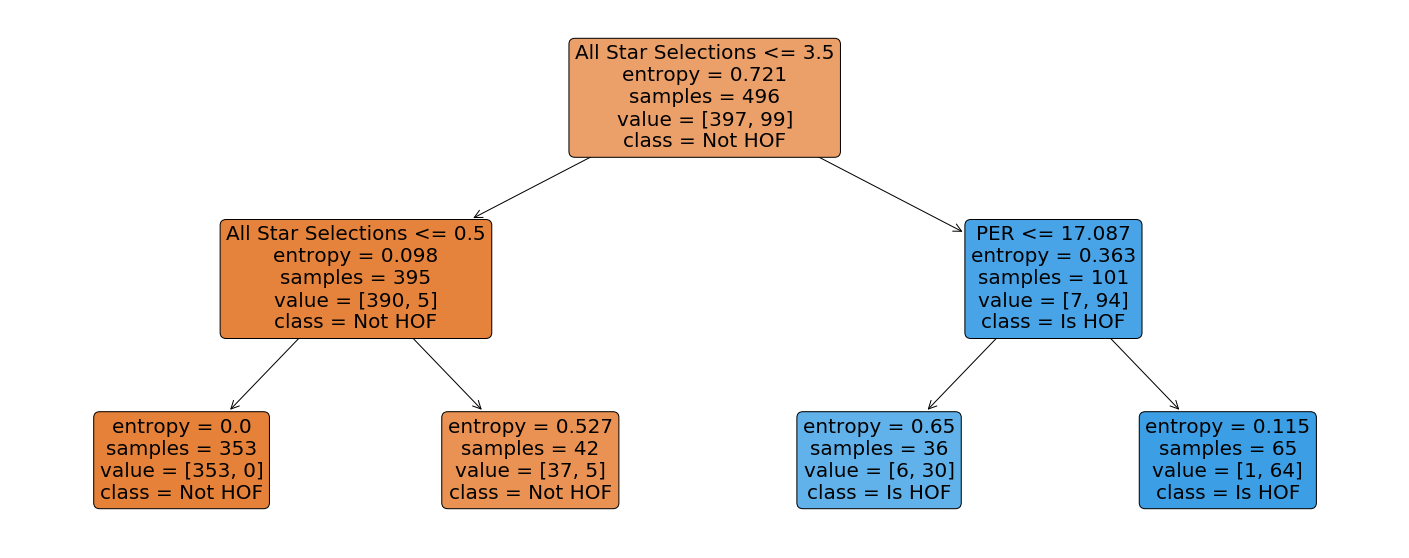

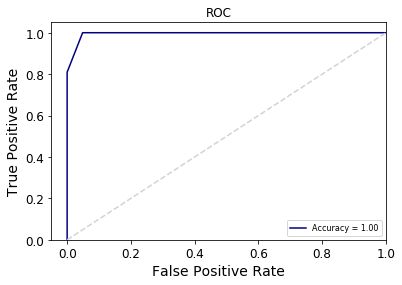

TREE DEPTH: 4
Cross Val Score: [0.95169082 0.96135266 0.95145631]

[[103   0]
 [  6  15]]

              precision    recall  f1-score   support

     Not HOF       0.94      1.00      0.97       103
      Is HOF       1.00      0.71      0.83        21

    accuracy                           0.95       124
   macro avg       0.97      0.86      0.90       124
weighted avg       0.95      0.95      0.95       124


Accuracy =  0.9031437817845586


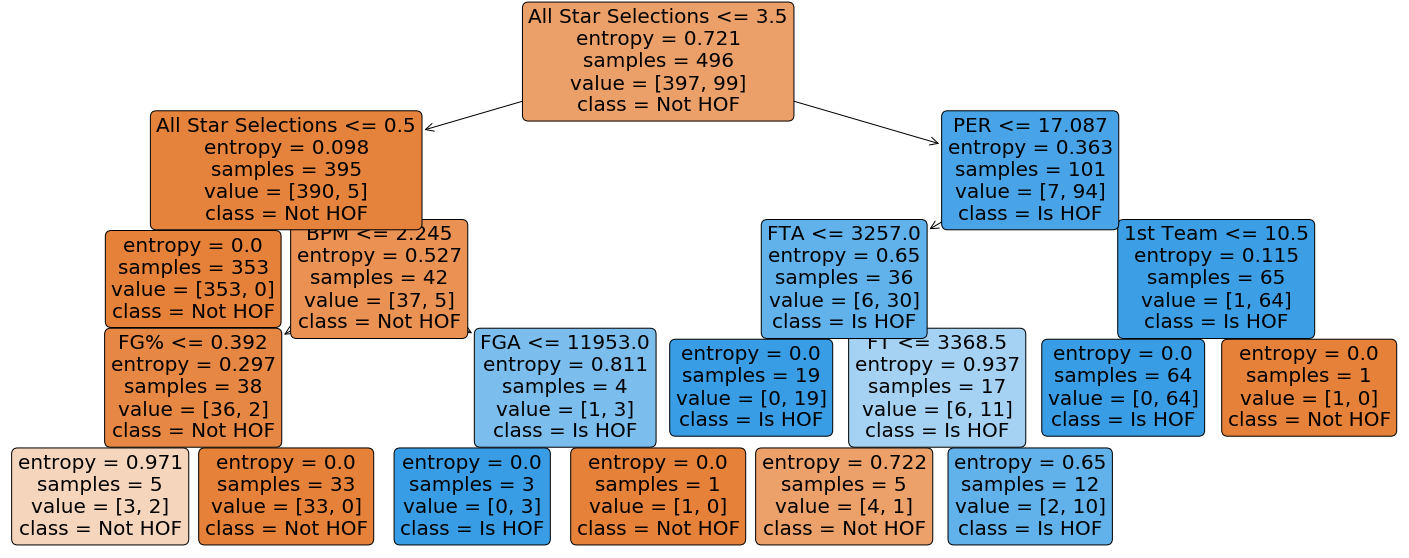

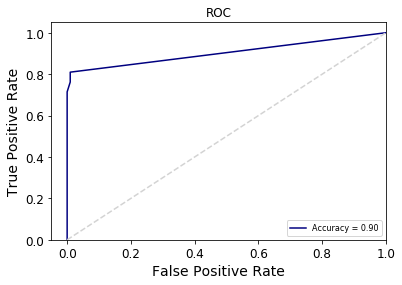

TREE DEPTH: 6
Cross Val Score: [0.95169082 0.96618357 0.9368932 ]

[[103   0]
 [  6  15]]

              precision    recall  f1-score   support

     Not HOF       0.94      1.00      0.97       103
      Is HOF       1.00      0.71      0.83        21

    accuracy                           0.95       124
   macro avg       0.97      0.86      0.90       124
weighted avg       0.95      0.95      0.95       124


Accuracy =  0.8571428571428572


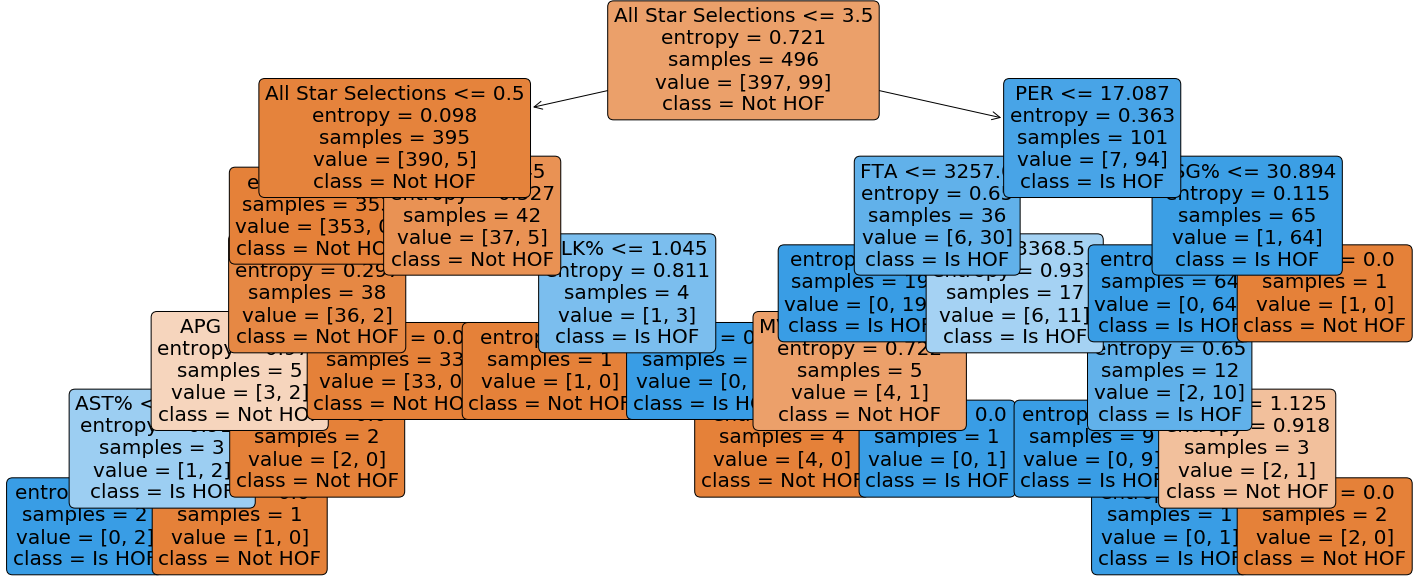

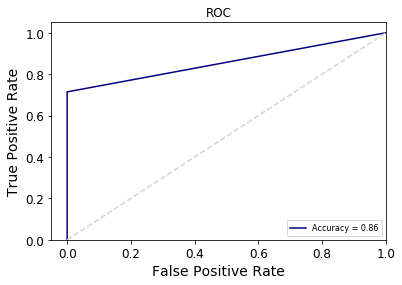

TREE DEPTH: 8
Cross Val Score: [0.95652174 0.96135266 0.94174757]

[[103   0]
 [  6  15]]

              precision    recall  f1-score   support

     Not HOF       0.94      1.00      0.97       103
      Is HOF       1.00      0.71      0.83        21

    accuracy                           0.95       124
   macro avg       0.97      0.86      0.90       124
weighted avg       0.95      0.95      0.95       124


Accuracy =  0.8571428571428572


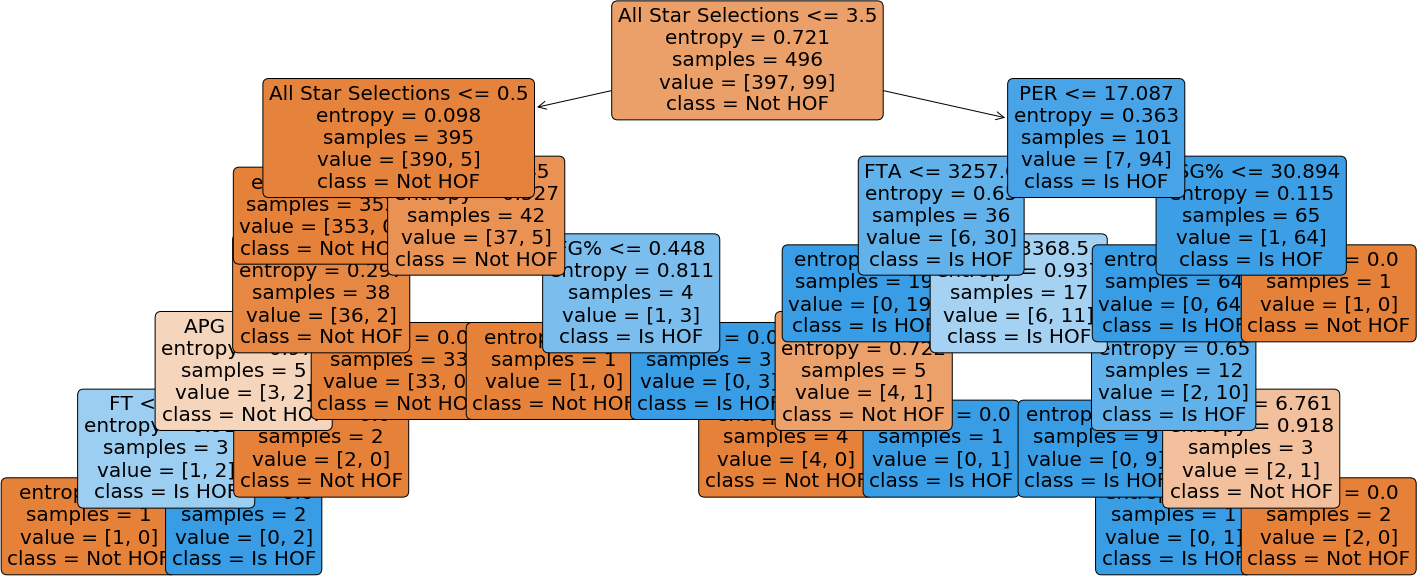

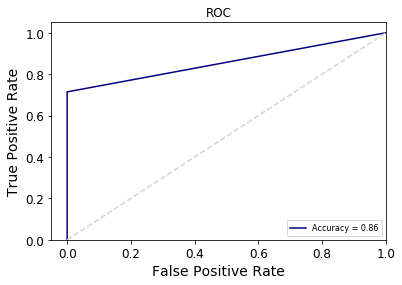

TREE DEPTH: 10
Cross Val Score: [0.96135266 0.95652174 0.94660194]

[[103   0]
 [  5  16]]

              precision    recall  f1-score   support

     Not HOF       0.95      1.00      0.98       103
      Is HOF       1.00      0.76      0.86        21

    accuracy                           0.96       124
   macro avg       0.98      0.88      0.92       124
weighted avg       0.96      0.96      0.96       124


Accuracy =  0.8809523809523809


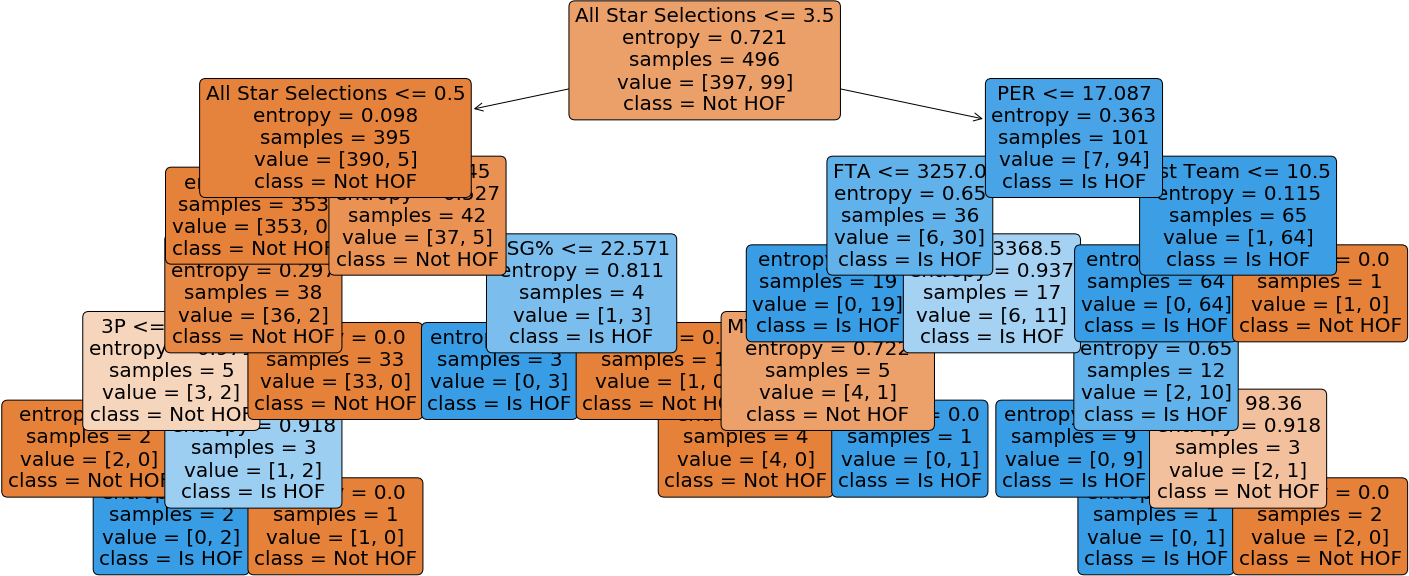

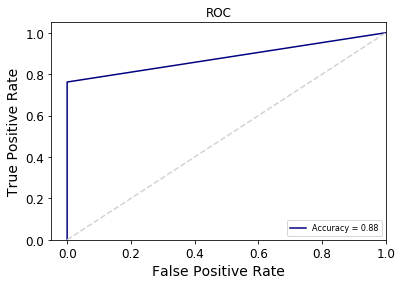

In [8]:
depth = [2,4,6,8,10]

print('TRAIN/TEST SPLIT: 80/20')
print()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)
    
for values in depth:
    print('TREE DEPTH: ' + str(values))
    tree_clf = DecisionTreeClassifier(max_depth=values, criterion="entropy")
    tree_clf.fit(X_train, y_train)

    print("Cross Val Score: " + str(cross_val_score(tree_clf, allPlayers[feature_columns], allPlayers['isHOF'], cv=3)))
    print()

    y_pred = tree_clf.predict(X_test)

    # plot a confusion matrix
    confusion_mat = confusion_matrix(y_test, y_pred)

    print(confusion_mat)
    print()

    target_names = ['Not HOF','Is HOF']
    result_metrics = classification_report(y_test, y_pred, target_names=target_names)

    print(result_metrics)
        
    plt.figure(figsize=(25,10))
    a = plot_tree(tree_clf, 
            feature_names=feature_columns, 
            class_names=target_names, 
            filled=True, 
            rounded=True, 
            fontsize=20)
        

    print()
        
    y_score = tree_clf.predict_proba(X_test)

    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_score[:,1])

    roc_auc = auc(false_positive_rate, true_positive_rate)
    print('Accuracy = ', roc_auc)

    count = 1

    # Get different color each graph line
    colorSet = ['navy', 'greenyellow', 'deepskyblue', 'darkviolet', 'crimson', 
                'darkslategray', 'indigo', 'brown', 'orange', 'palevioletred', 'mediumseagreen',
                'k', 'darkgoldenrod', 'g', 'midnightblue', 'c', 'y', 'r', 'b', 'm', 'lawngreen'
                'mediumturquoise', 'lime', 'teal', 'drive', 'sienna', 'sandybrown']
    color = colorSet[count-1]
        
    # Plotting
    plt.figure()
    plt.title('ROC')
    plt.plot(false_positive_rate, true_positive_rate, c=color, label=('Accuracy = %0.2f'%roc_auc))
    plt.legend(loc='lower right', prop={'size':8})
    plt.plot([0,1],[0,1], color='lightgrey', linestyle='--')
    plt.xlim([-0.05,1.0])
    plt.ylim([0.0,1.05])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
        

In [9]:
kf = KFold(n_splits=10, random_state=None, shuffle=True) # Define the split - into 2 folds 

kf.get_n_splits(X) # returns the number of splitting iterations in the cross-validator

print(kf) 

KFold(n_splits=10, random_state=None, shuffle=True)


TRAIN/TEST SPLIT: 80/20

TREE DEPTH: 2
Cross Val Score: [0.97101449 0.96135266 0.95145631]

[[104   2]
 [  3  15]]

              precision    recall  f1-score   support

     Not HOF       0.97      0.98      0.98       106
      Is HOF       0.88      0.83      0.86        18

    accuracy                           0.96       124
   macro avg       0.93      0.91      0.92       124
weighted avg       0.96      0.96      0.96       124


Accuracy =  0.9027777777777778


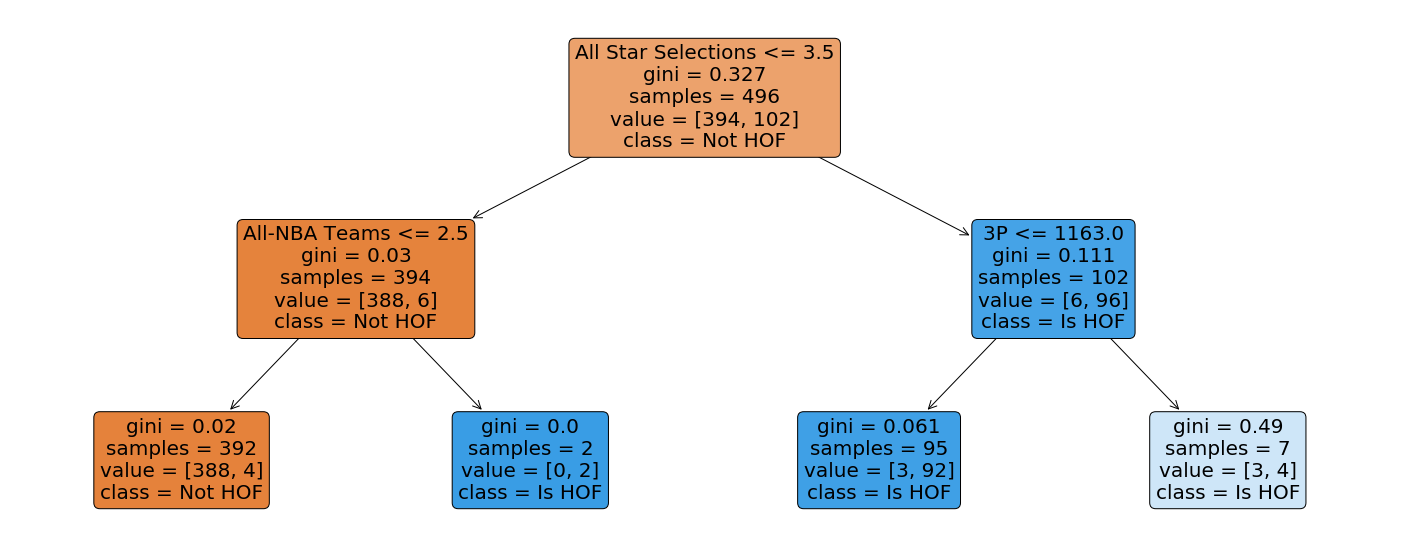

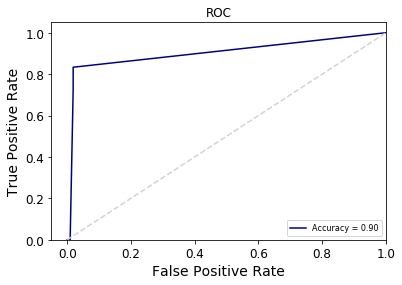

TREE DEPTH: 4
Cross Val Score: [0.96135266 0.97584541 0.95145631]

[[104   2]
 [  6  12]]

              precision    recall  f1-score   support

     Not HOF       0.95      0.98      0.96       106
      Is HOF       0.86      0.67      0.75        18

    accuracy                           0.94       124
   macro avg       0.90      0.82      0.86       124
weighted avg       0.93      0.94      0.93       124


Accuracy =  0.8765723270440251


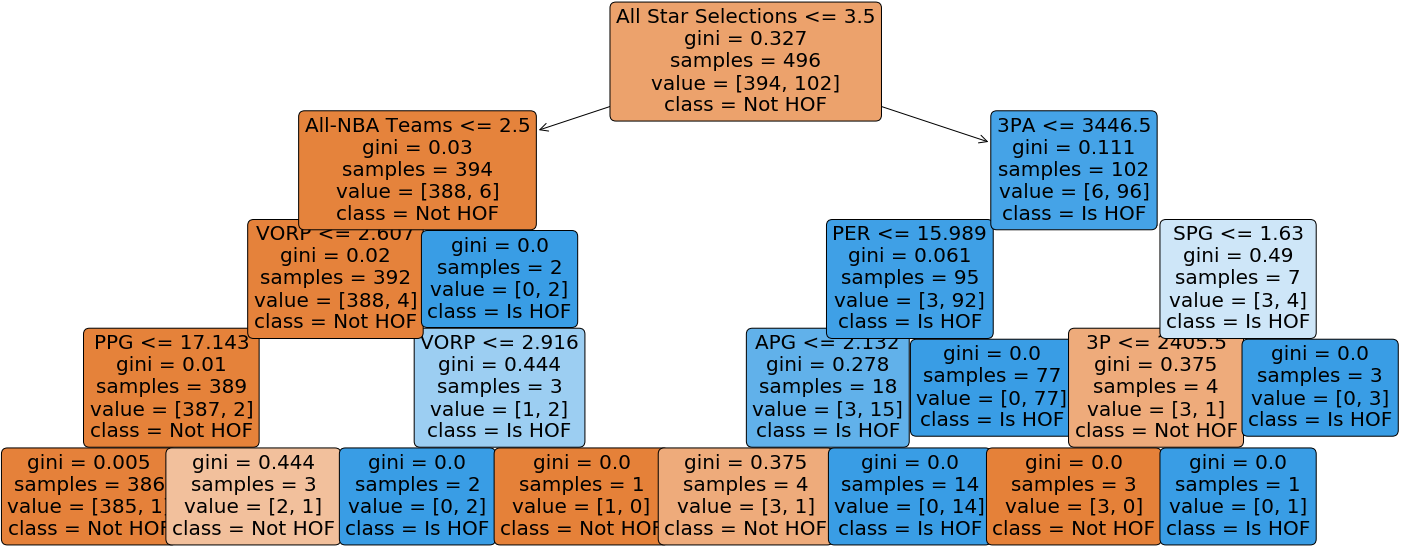

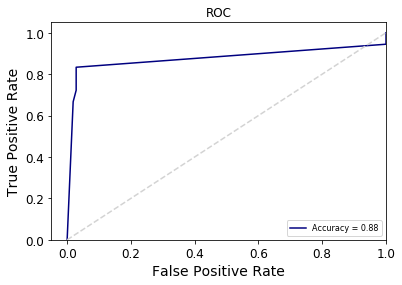

TREE DEPTH: 6
Cross Val Score: [0.94202899 0.97101449 0.95145631]

[[104   2]
 [  2  16]]

              precision    recall  f1-score   support

     Not HOF       0.98      0.98      0.98       106
      Is HOF       0.89      0.89      0.89        18

    accuracy                           0.97       124
   macro avg       0.94      0.94      0.94       124
weighted avg       0.97      0.97      0.97       124


Accuracy =  0.9350104821802935


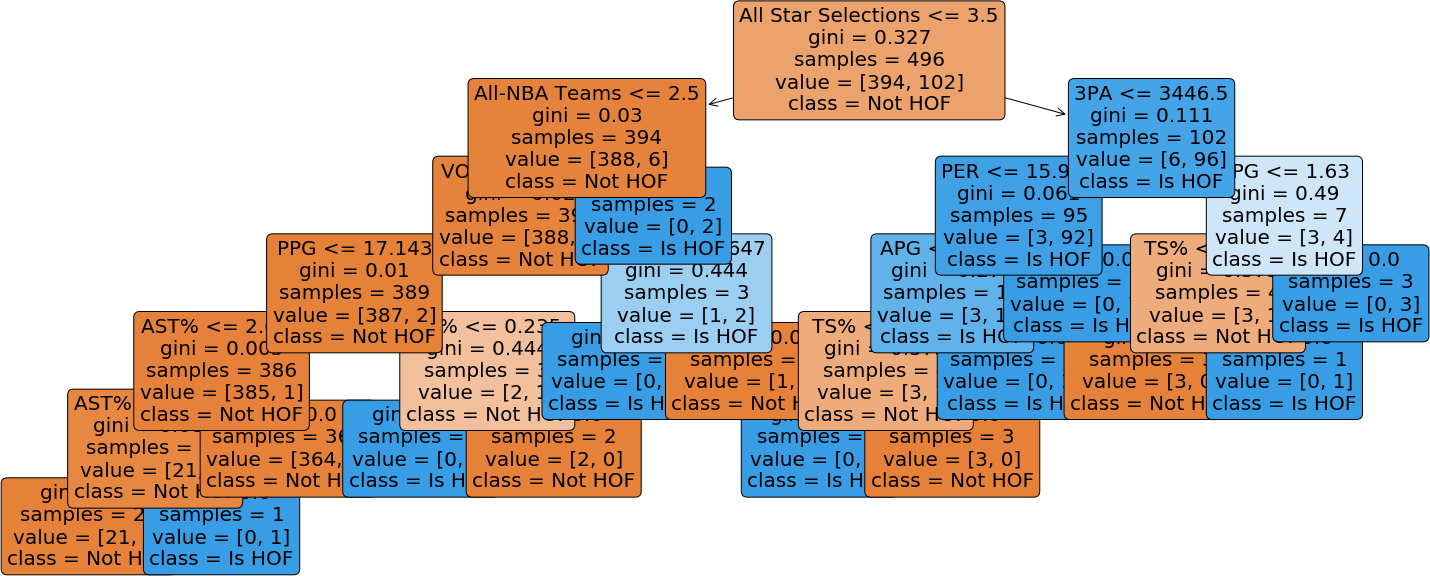

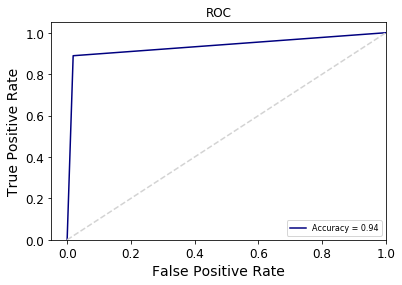

TREE DEPTH: 8
Cross Val Score: [0.96135266 0.96135266 0.95145631]

[[104   2]
 [  4  14]]

              precision    recall  f1-score   support

     Not HOF       0.96      0.98      0.97       106
      Is HOF       0.88      0.78      0.82        18

    accuracy                           0.95       124
   macro avg       0.92      0.88      0.90       124
weighted avg       0.95      0.95      0.95       124


Accuracy =  0.8794549266247379


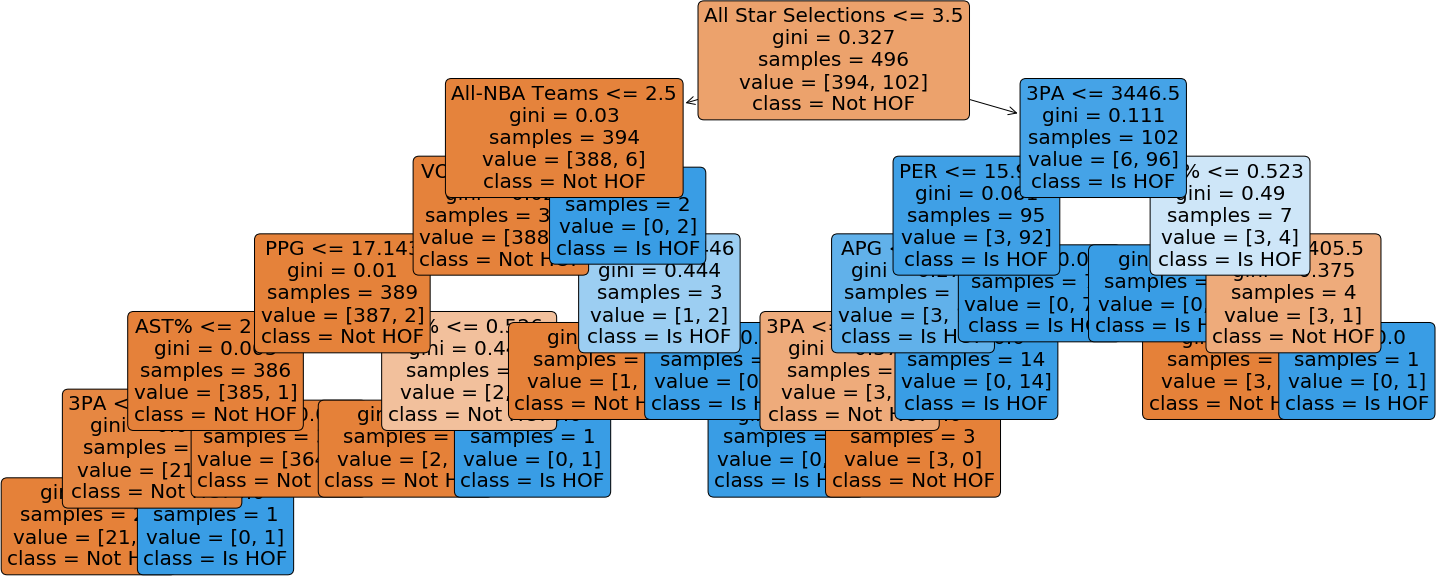

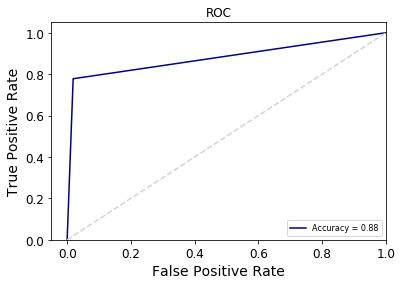

TREE DEPTH: 10
Cross Val Score: [0.95169082 0.96135266 0.94660194]

[[104   2]
 [  3  15]]

              precision    recall  f1-score   support

     Not HOF       0.97      0.98      0.98       106
      Is HOF       0.88      0.83      0.86        18

    accuracy                           0.96       124
   macro avg       0.93      0.91      0.92       124
weighted avg       0.96      0.96      0.96       124


Accuracy =  0.9072327044025158


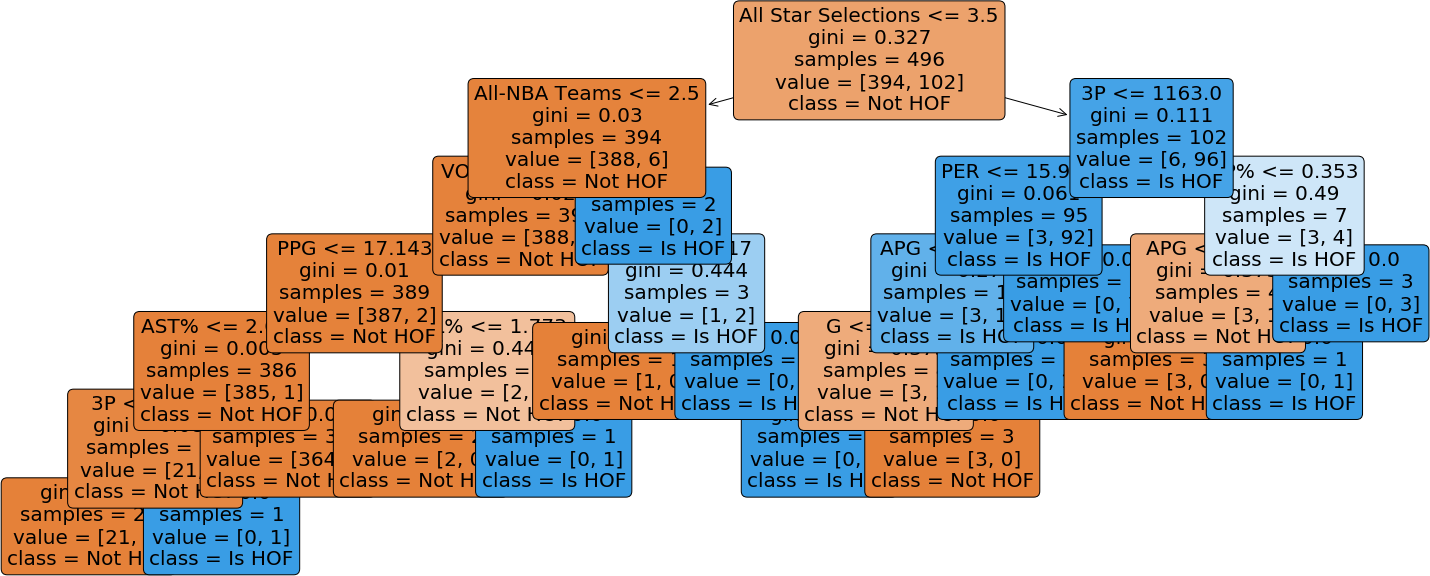

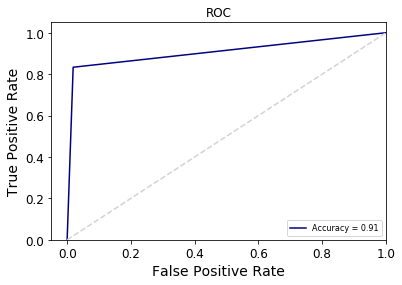

In [10]:
print('TRAIN/TEST SPLIT: 80/20')
print()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)
    
for values in depth:
    print('TREE DEPTH: ' + str(values))
    tree_clf = DecisionTreeClassifier(max_depth=values, criterion="gini")
    tree_clf.fit(X_train, y_train)

    print("Cross Val Score: " + str(cross_val_score(tree_clf, allPlayers[feature_columns], allPlayers['isHOF'], cv=3)))
    print()

    y_pred = tree_clf.predict(X_test)

    # plot a confusion matrix
    confusion_mat = confusion_matrix(y_test, y_pred)

    print(confusion_mat)
    print()

    target_names = ['Not HOF','Is HOF']
    result_metrics = classification_report(y_test, y_pred, target_names=target_names)

    print(result_metrics)
        
    plt.figure(figsize=(25,10))
    a = plot_tree(tree_clf, 
            feature_names=feature_columns, 
            class_names=target_names, 
            filled=True, 
            rounded=True, 
            fontsize=20)
        

    print()
        
    y_score = tree_clf.predict_proba(X_test)

    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_score[:,1])

    roc_auc = auc(false_positive_rate, true_positive_rate)
    print('Accuracy = ', roc_auc)

    count = 1

    # Get different color each graph line
    colorSet = ['navy', 'greenyellow', 'deepskyblue', 'darkviolet', 'crimson', 
                'darkslategray', 'indigo', 'brown', 'orange', 'palevioletred', 'mediumseagreen',
                'k', 'darkgoldenrod', 'g', 'midnightblue', 'c', 'y', 'r', 'b', 'm', 'lawngreen'
                'mediumturquoise', 'lime', 'teal', 'drive', 'sienna', 'sandybrown']
    color = colorSet[count-1]
        
    # Plotting
    plt.figure()
    plt.title('ROC')
    plt.plot(false_positive_rate, true_positive_rate, c=color, label=('Accuracy = %0.2f'%roc_auc))
    plt.legend(loc='lower right', prop={'size':8})
    plt.plot([0,1],[0,1], color='lightgrey', linestyle='--')
    plt.xlim([-0.05,1.0])
    plt.ylim([0.0,1.05])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
        

In [11]:
kf = KFold(n_splits=10, random_state=None, shuffle=True) # Define the split - into 2 folds 

kf.get_n_splits(X) # returns the number of splitting iterations in the cross-validator

print(kf) 

KFold(n_splits=10, random_state=None, shuffle=True)


              precision    recall  f1-score   support

     Not HOF       1.00      1.00      1.00        57
      Is HOF       1.00      1.00      1.00         5

    accuracy                           1.00        62
   macro avg       1.00      1.00      1.00        62
weighted avg       1.00      1.00      1.00        62


Accuracy =  1.0


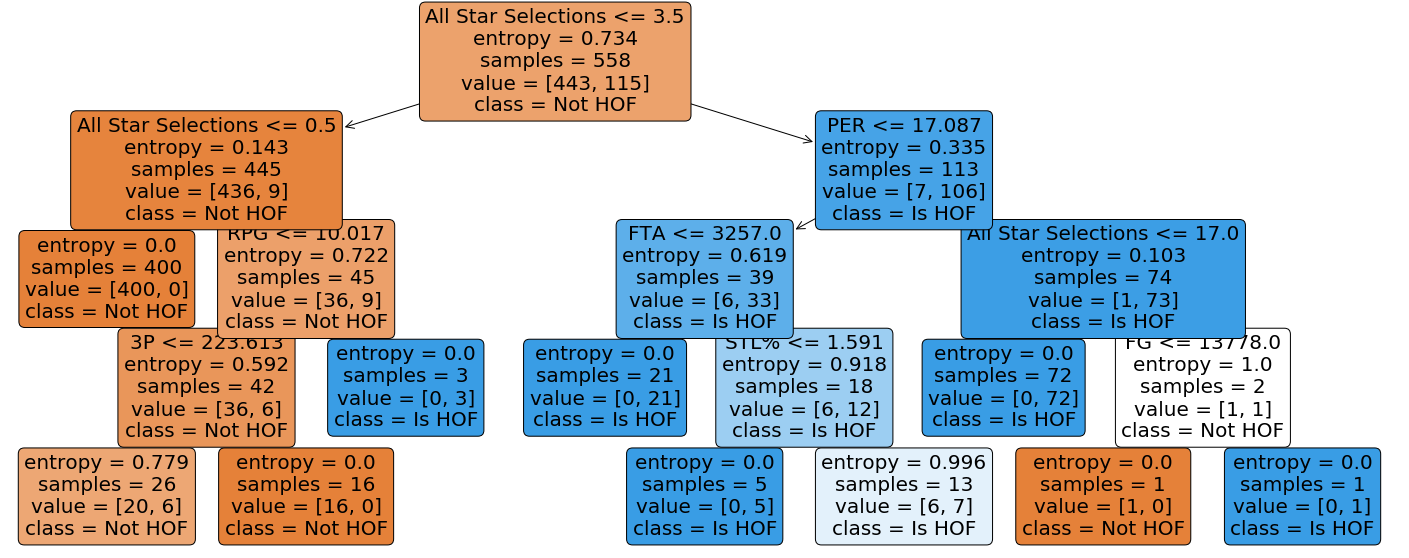

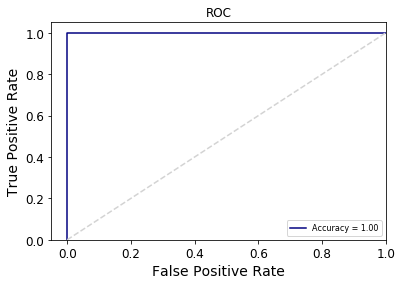

              precision    recall  f1-score   support

     Not HOF       0.98      0.96      0.97        55
      Is HOF       0.75      0.86      0.80         7

    accuracy                           0.95        62
   macro avg       0.87      0.91      0.89        62
weighted avg       0.96      0.95      0.95        62


Accuracy =  0.9155844155844156


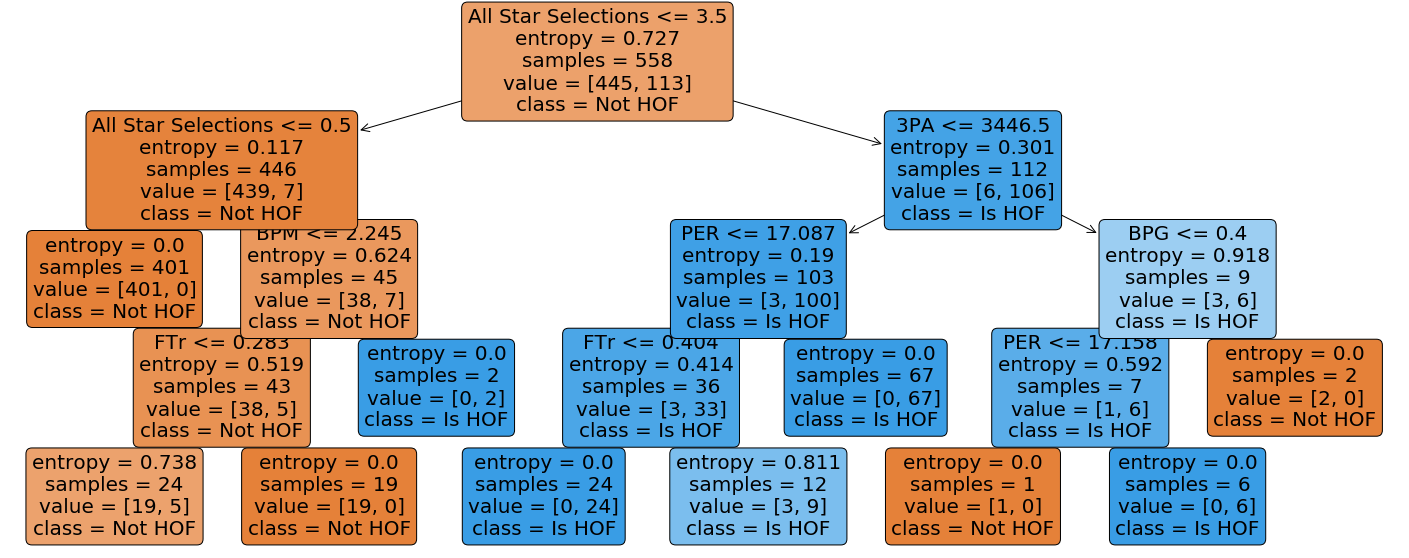

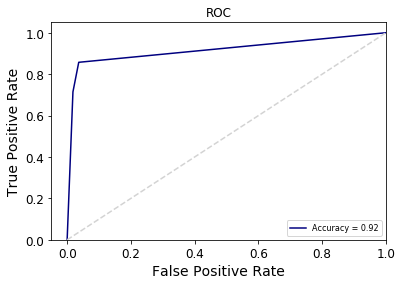

              precision    recall  f1-score   support

     Not HOF       0.92      0.98      0.95        47
      Is HOF       0.92      0.73      0.81        15

    accuracy                           0.92        62
   macro avg       0.92      0.86      0.88        62
weighted avg       0.92      0.92      0.92        62


Accuracy =  0.9418439716312056


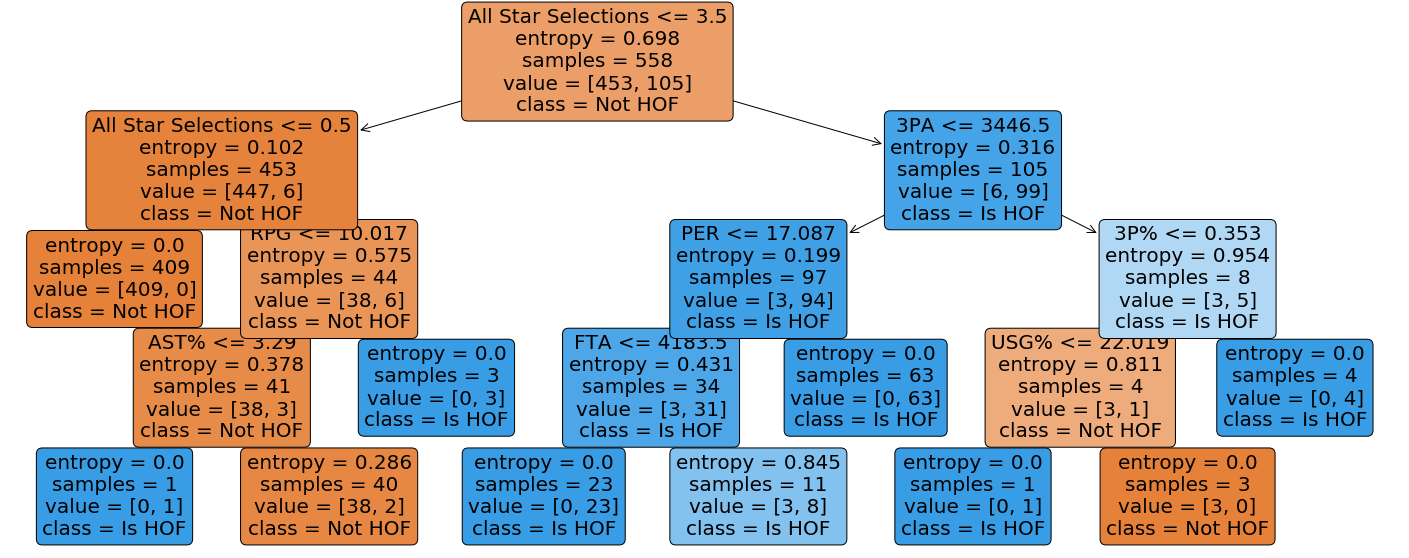

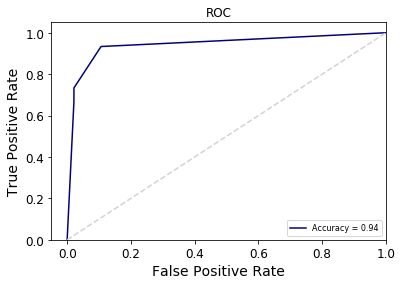

              precision    recall  f1-score   support

     Not HOF       0.96      1.00      0.98        50
      Is HOF       1.00      0.83      0.91        12

    accuracy                           0.97        62
   macro avg       0.98      0.92      0.94        62
weighted avg       0.97      0.97      0.97        62


Accuracy =  1.0


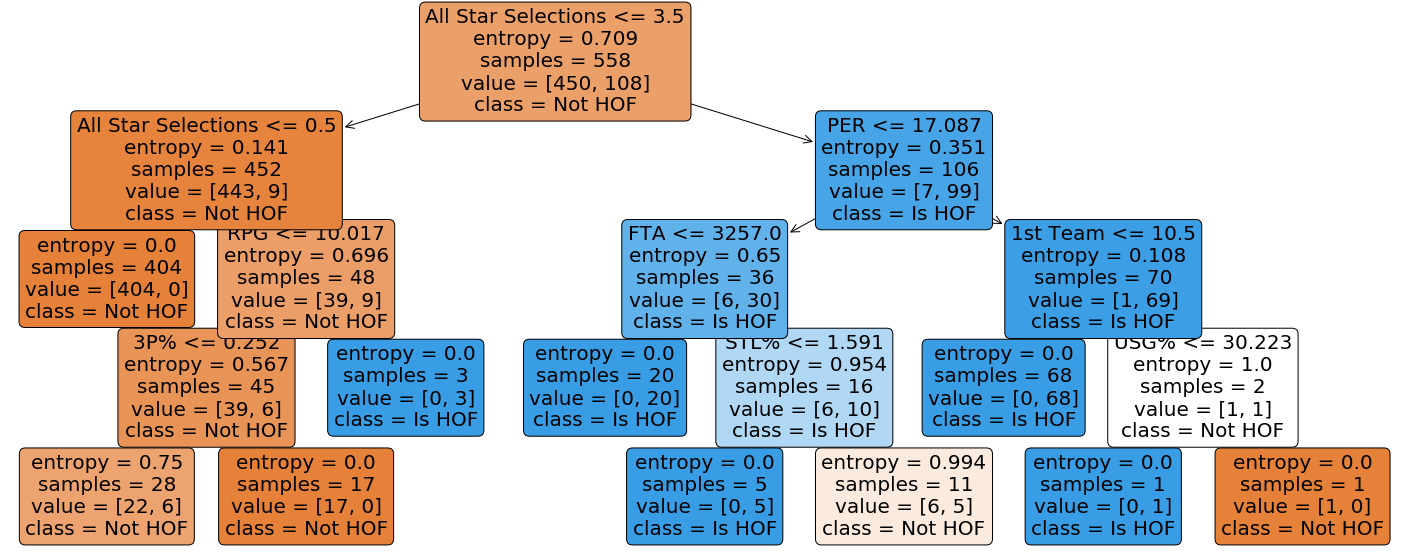

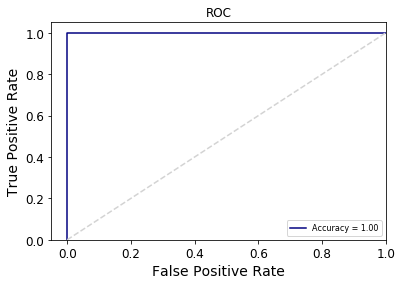

              precision    recall  f1-score   support

     Not HOF       0.96      1.00      0.98        45
      Is HOF       1.00      0.88      0.94        17

    accuracy                           0.97        62
   macro avg       0.98      0.94      0.96        62
weighted avg       0.97      0.97      0.97        62


Accuracy =  1.0


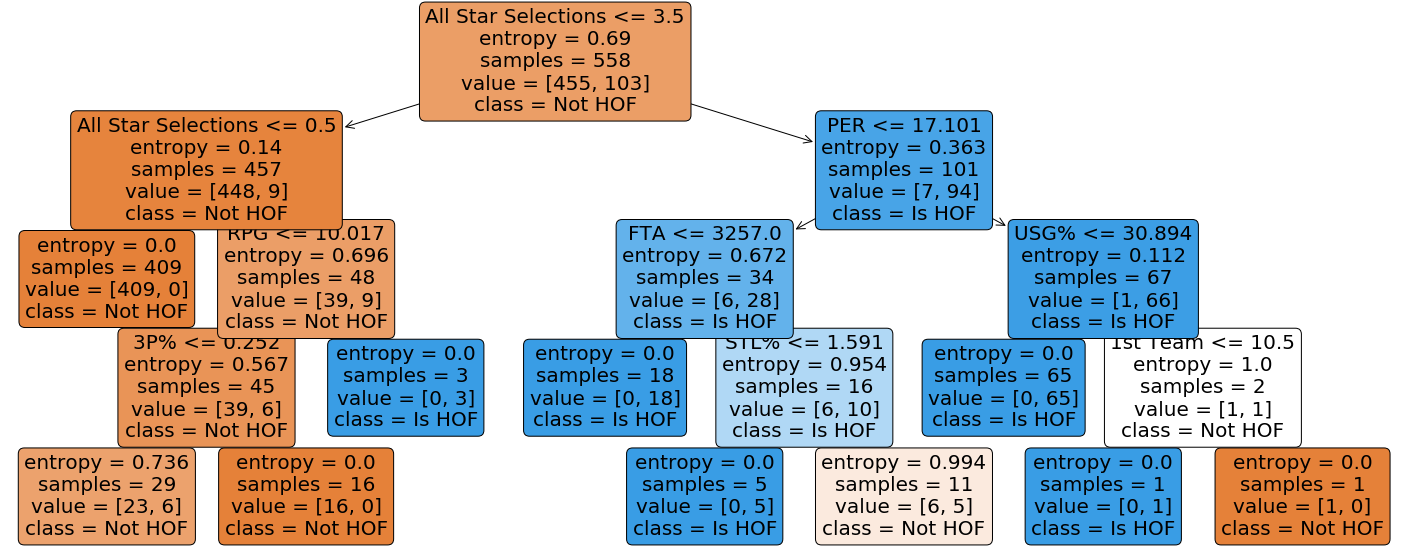

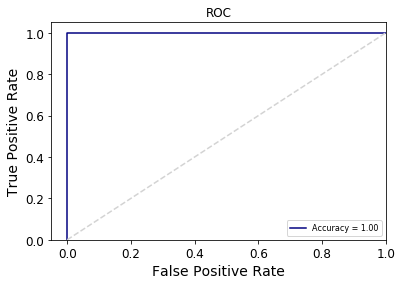

              precision    recall  f1-score   support

     Not HOF       0.92      0.98      0.95        46
      Is HOF       0.92      0.75      0.83        16

    accuracy                           0.92        62
   macro avg       0.92      0.86      0.89        62
weighted avg       0.92      0.92      0.92        62


Accuracy =  0.8913043478260869


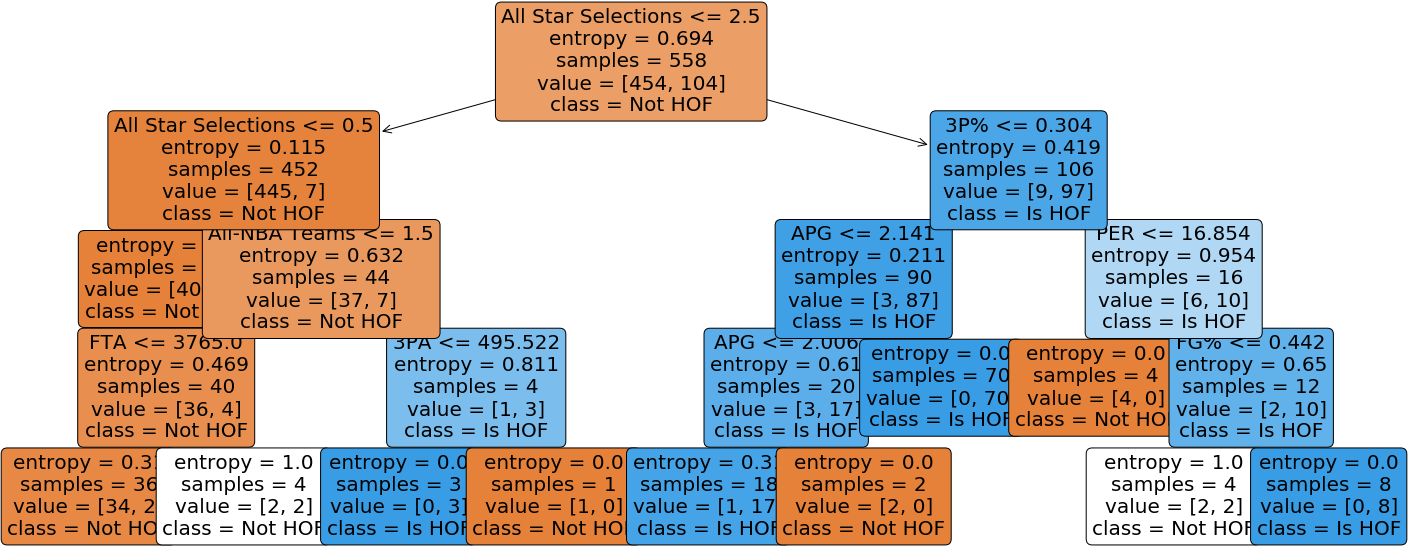

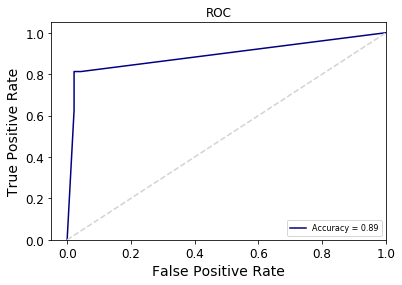

              precision    recall  f1-score   support

     Not HOF       0.96      1.00      0.98        48
      Is HOF       1.00      0.86      0.92        14

    accuracy                           0.97        62
   macro avg       0.98      0.93      0.95        62
weighted avg       0.97      0.97      0.97        62


Accuracy =  0.9241071428571429


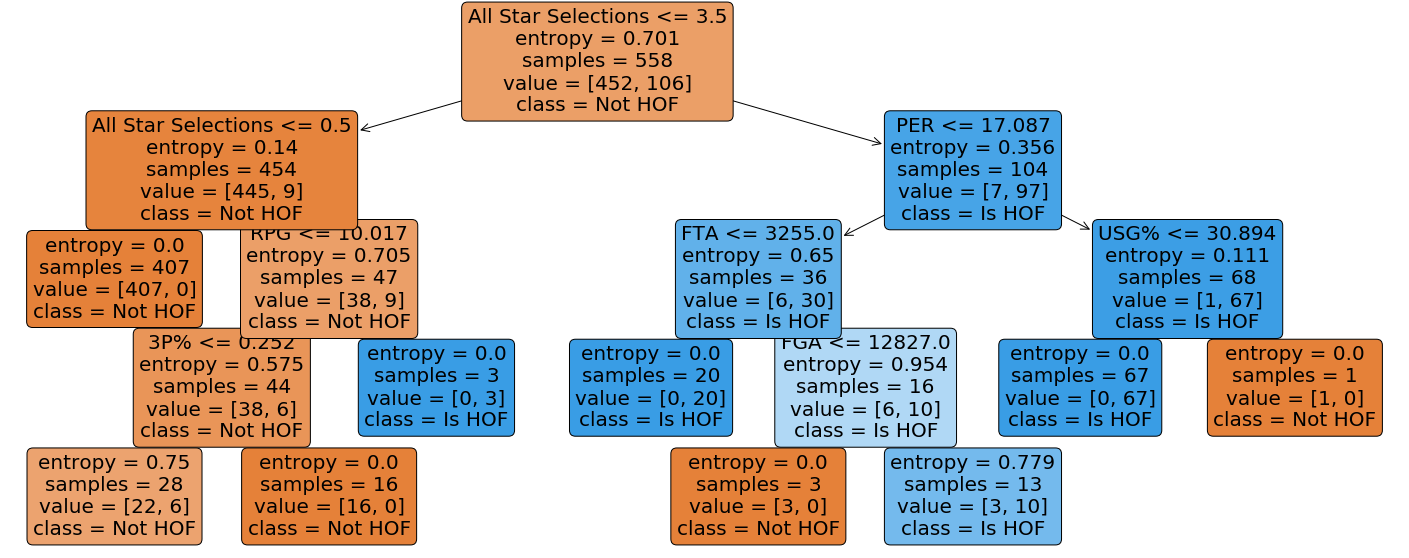

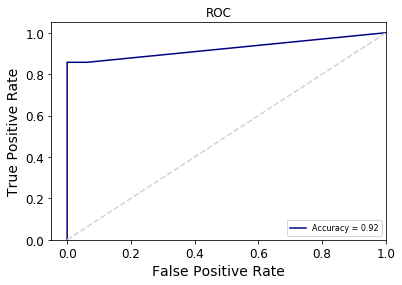

              precision    recall  f1-score   support

     Not HOF       0.98      0.96      0.97        55
      Is HOF       0.75      0.86      0.80         7

    accuracy                           0.95        62
   macro avg       0.87      0.91      0.89        62
weighted avg       0.96      0.95      0.95        62


Accuracy =  0.912987012987013


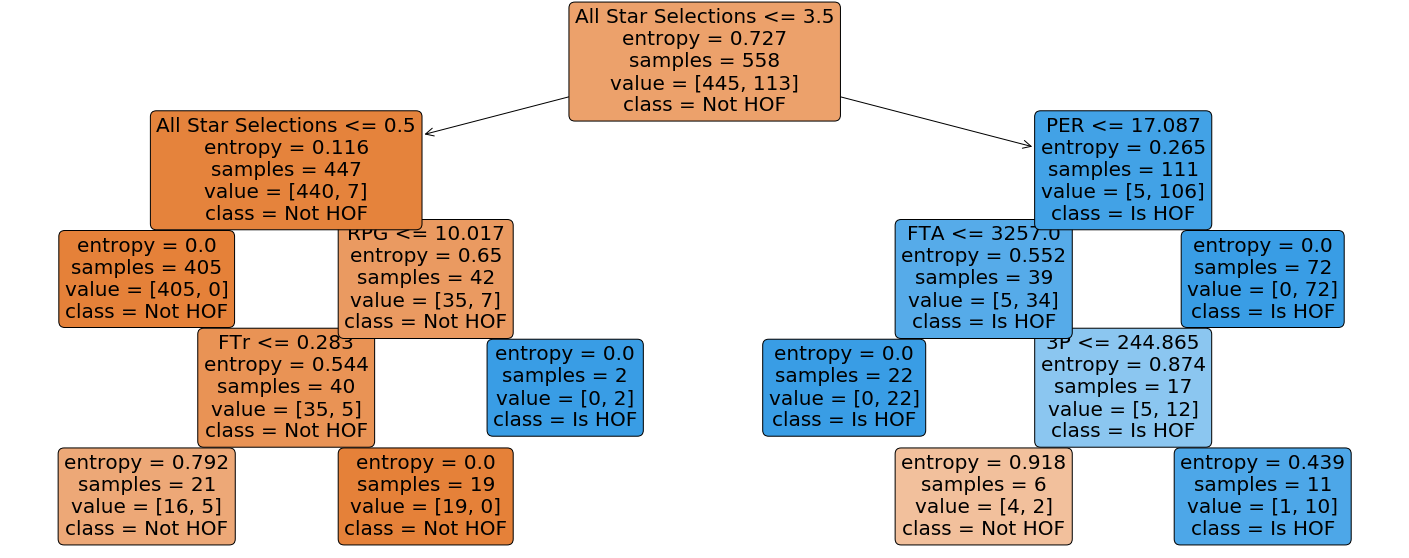

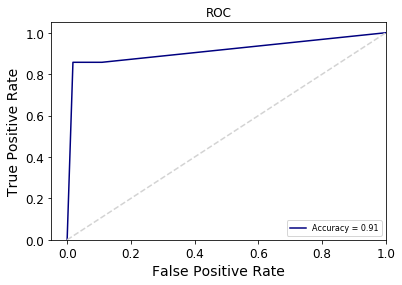

              precision    recall  f1-score   support

     Not HOF       0.98      0.98      0.98        48
      Is HOF       0.93      0.93      0.93        14

    accuracy                           0.97        62
   macro avg       0.95      0.95      0.95        62
weighted avg       0.97      0.97      0.97        62


Accuracy =  0.9501488095238096


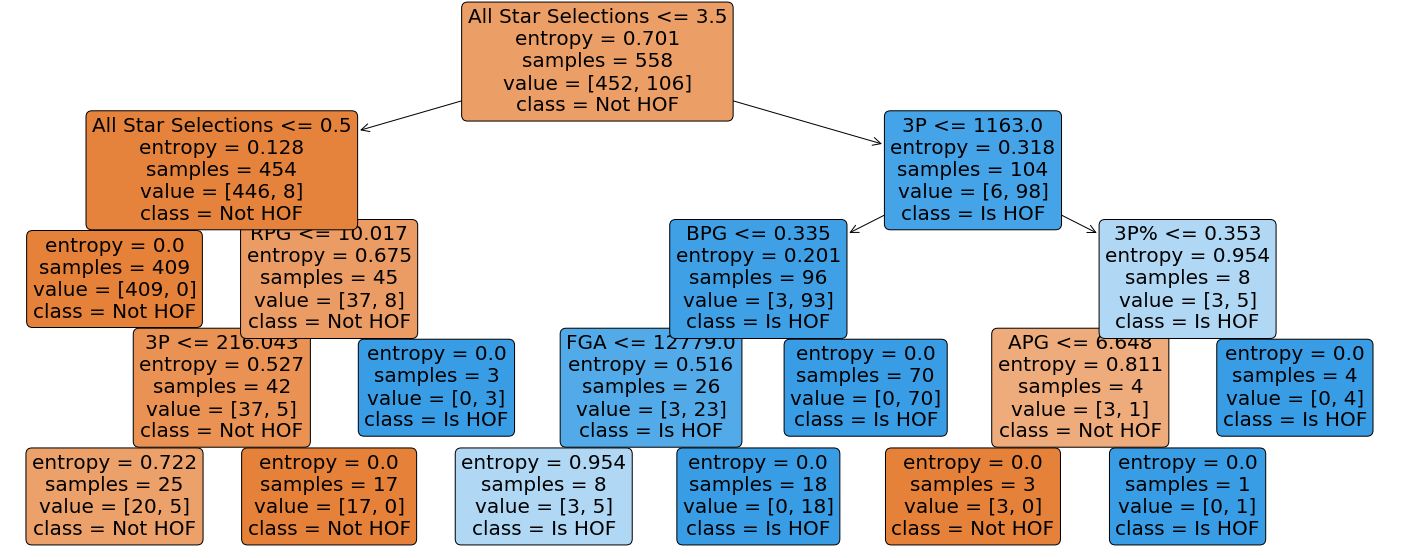

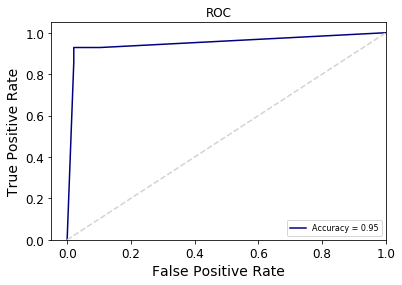

              precision    recall  f1-score   support

     Not HOF       0.98      0.96      0.97        49
      Is HOF       0.86      0.92      0.89        13

    accuracy                           0.95        62
   macro avg       0.92      0.94      0.93        62
weighted avg       0.95      0.95      0.95        62


Accuracy =  0.9332810047095762


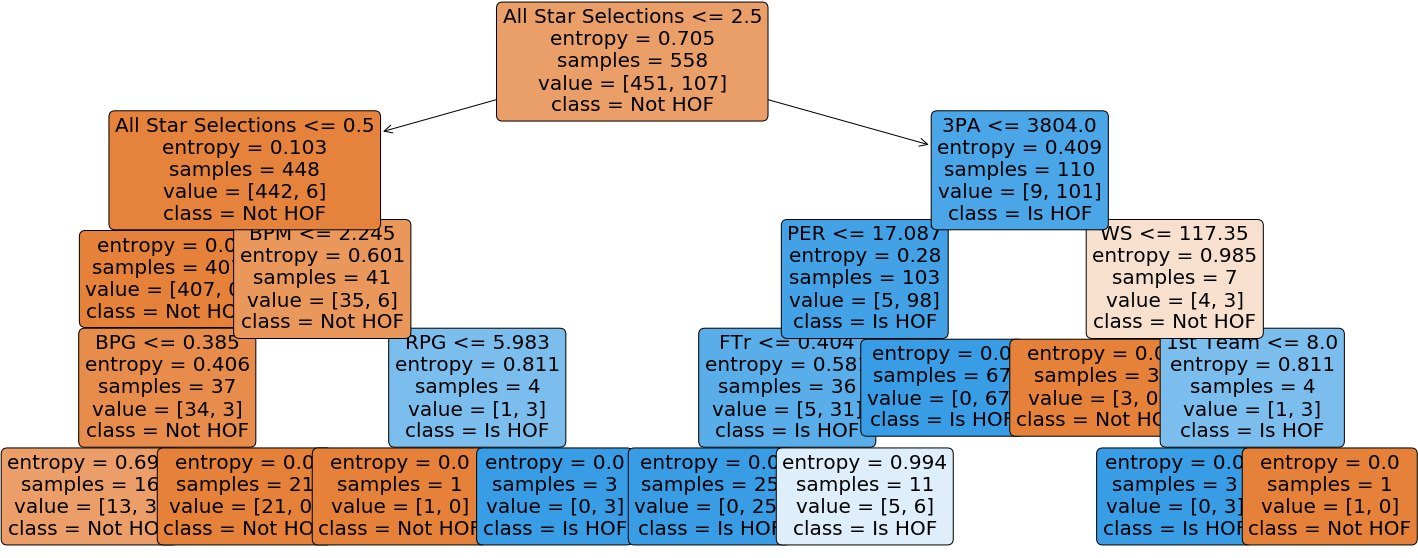

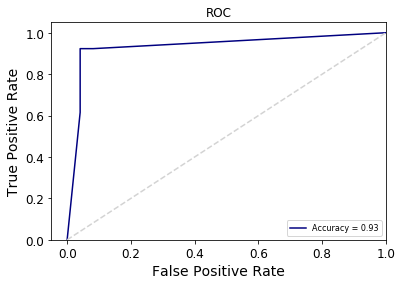

In [12]:
tree_clf = DecisionTreeClassifier(max_depth=4, criterion="entropy")

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    tree_clf.fit(X_train, y_train)
    
    y_pred = tree_clf.predict(X_test)
    
    print(classification_report(y_test, y_pred, target_names=target_names))
    
    plt.figure(figsize=(25,10))
    a = plot_tree(tree_clf, 
              feature_names=feature_columns, 
              class_names=target_names, 
              filled=True, 
              rounded=True, 
              fontsize=20)
        
    print()
    
    y_score = tree_clf.predict_proba(X_test)

    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_score[:,1])
    
    roc_auc = auc(false_positive_rate, true_positive_rate)
    print('Accuracy = ', roc_auc)

    count = 1

    # Get different color each graph line
    colorSet = ['navy', 'greenyellow', 'deepskyblue', 'darkviolet', 'crimson', 
                'darkslategray', 'indigo', 'brown', 'orange', 'palevioletred', 'mediumseagreen',
                'k', 'darkgoldenrod', 'g', 'midnightblue', 'c', 'y', 'r', 'b', 'm', 'lawngreen'
                'mediumturquoise', 'lime', 'teal', 'drive', 'sienna', 'sandybrown']
    color = colorSet[count-1]

    # Plotting
    plt.figure()
    plt.title('ROC')
    plt.plot(false_positive_rate, true_positive_rate, c=color, label=('Accuracy = %0.2f'%roc_auc))
    plt.legend(loc='lower right', prop={'size':8})
    plt.plot([0,1],[0,1], color='lightgrey', linestyle='--')
    plt.xlim([-0.05,1.0])
    plt.ylim([0.0,1.05])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

              precision    recall  f1-score   support

     Not HOF       0.98      0.92      0.95        51
      Is HOF       0.71      0.91      0.80        11

    accuracy                           0.92        62
   macro avg       0.85      0.92      0.87        62
weighted avg       0.93      0.92      0.92        62


Accuracy =  0.875222816399287


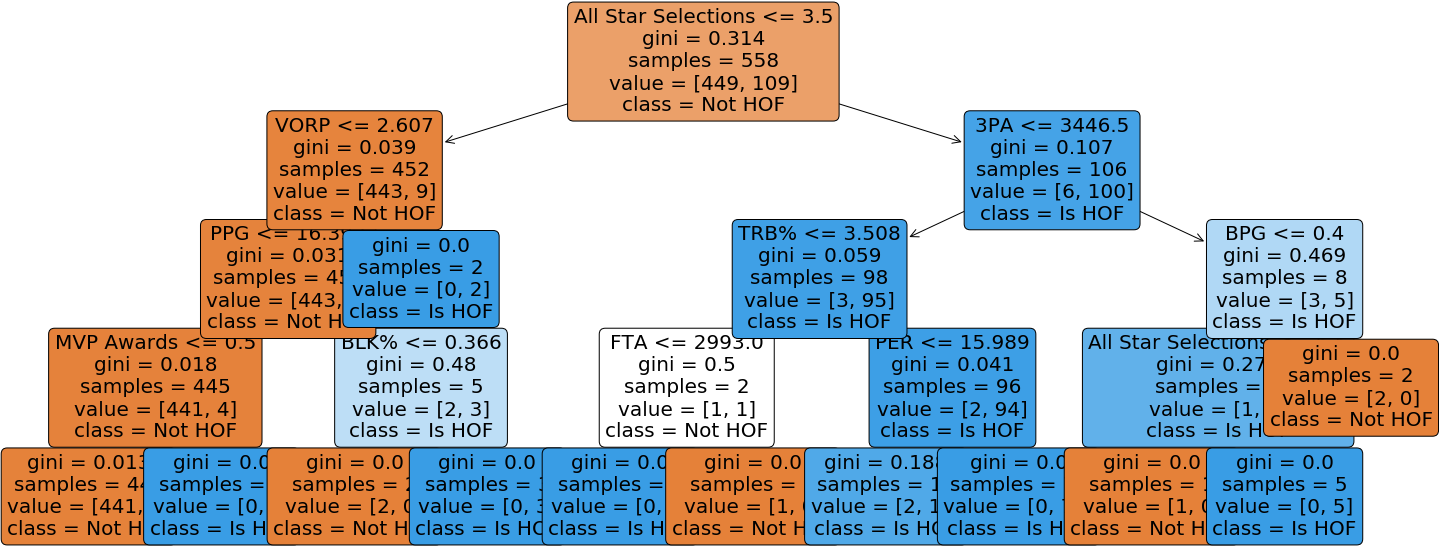

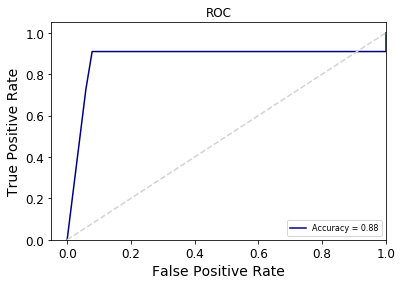

              precision    recall  f1-score   support

     Not HOF       1.00      0.96      0.98        56
      Is HOF       0.75      1.00      0.86         6

    accuracy                           0.97        62
   macro avg       0.88      0.98      0.92        62
weighted avg       0.98      0.97      0.97        62


Accuracy =  0.9821428571428572


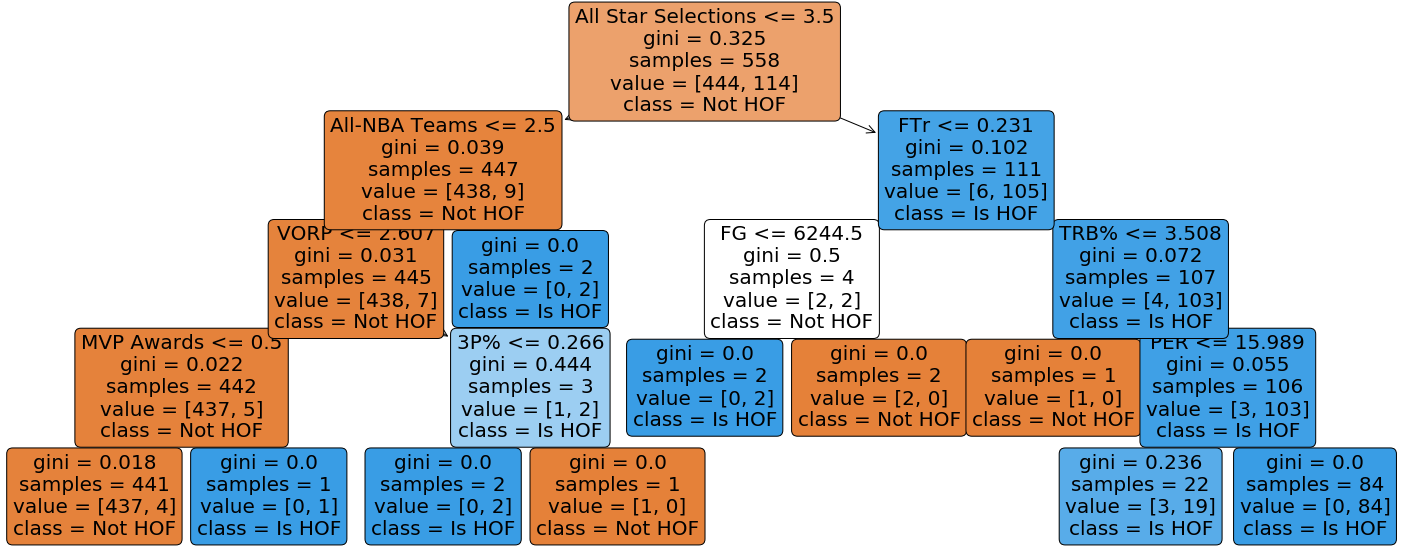

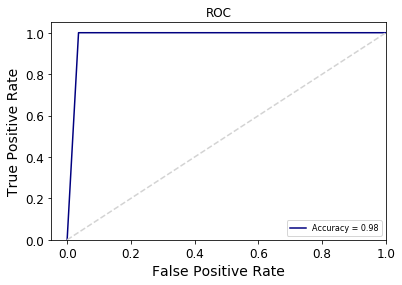

              precision    recall  f1-score   support

     Not HOF       0.96      1.00      0.98        52
      Is HOF       1.00      0.80      0.89        10

    accuracy                           0.97        62
   macro avg       0.98      0.90      0.94        62
weighted avg       0.97      0.97      0.97        62


Accuracy =  0.8500000000000001


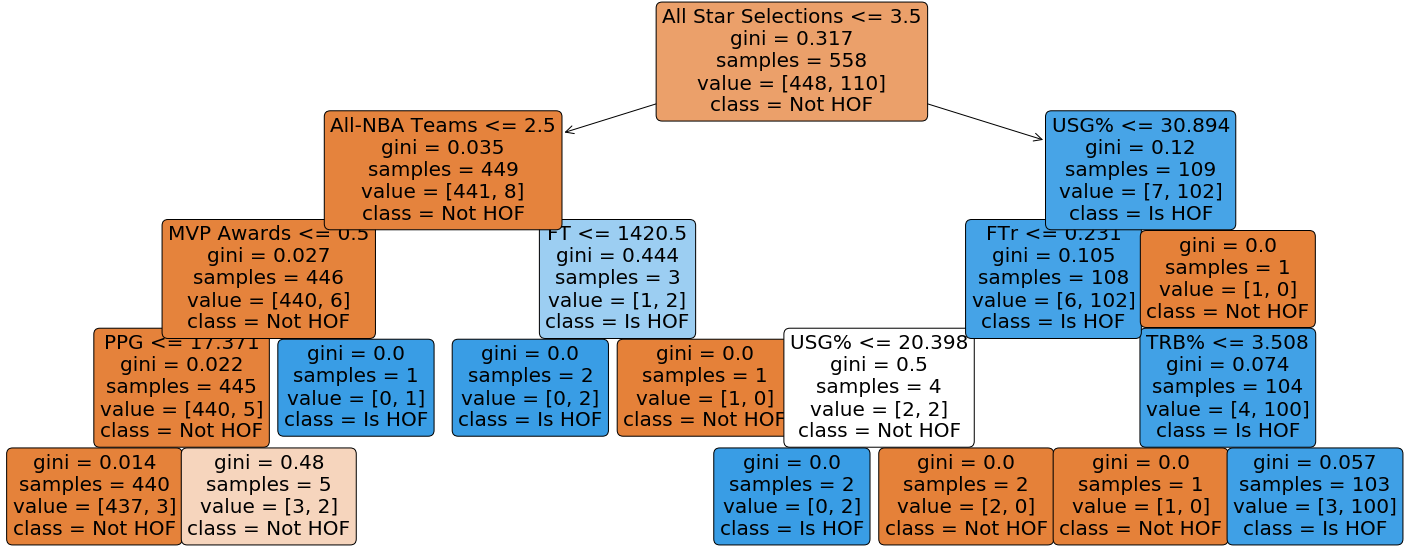

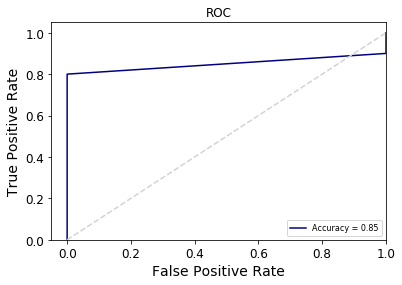

              precision    recall  f1-score   support

     Not HOF       0.90      0.98      0.94        45
      Is HOF       0.92      0.71      0.80        17

    accuracy                           0.90        62
   macro avg       0.91      0.84      0.87        62
weighted avg       0.90      0.90      0.90        62


Accuracy =  0.7555555555555554


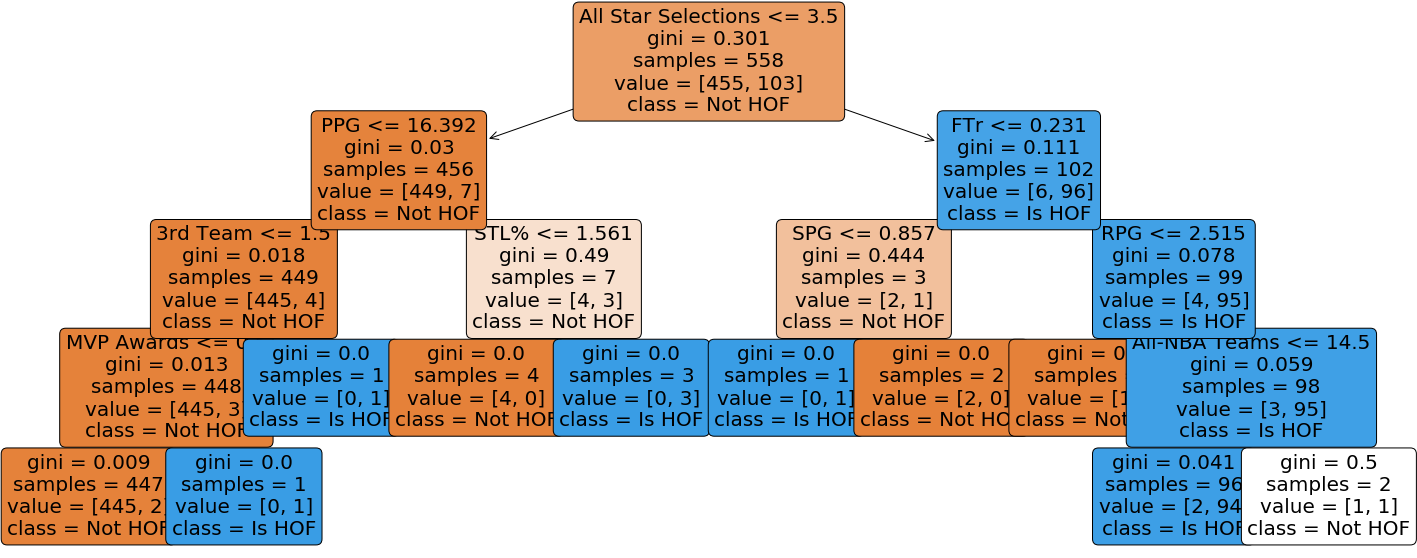

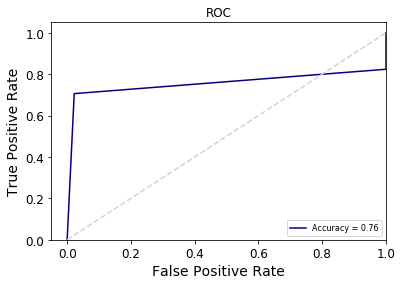

              precision    recall  f1-score   support

     Not HOF       0.98      0.98      0.98        49
      Is HOF       0.92      0.92      0.92        13

    accuracy                           0.97        62
   macro avg       0.95      0.95      0.95        62
weighted avg       0.97      0.97      0.97        62


Accuracy =  0.9050235478806908


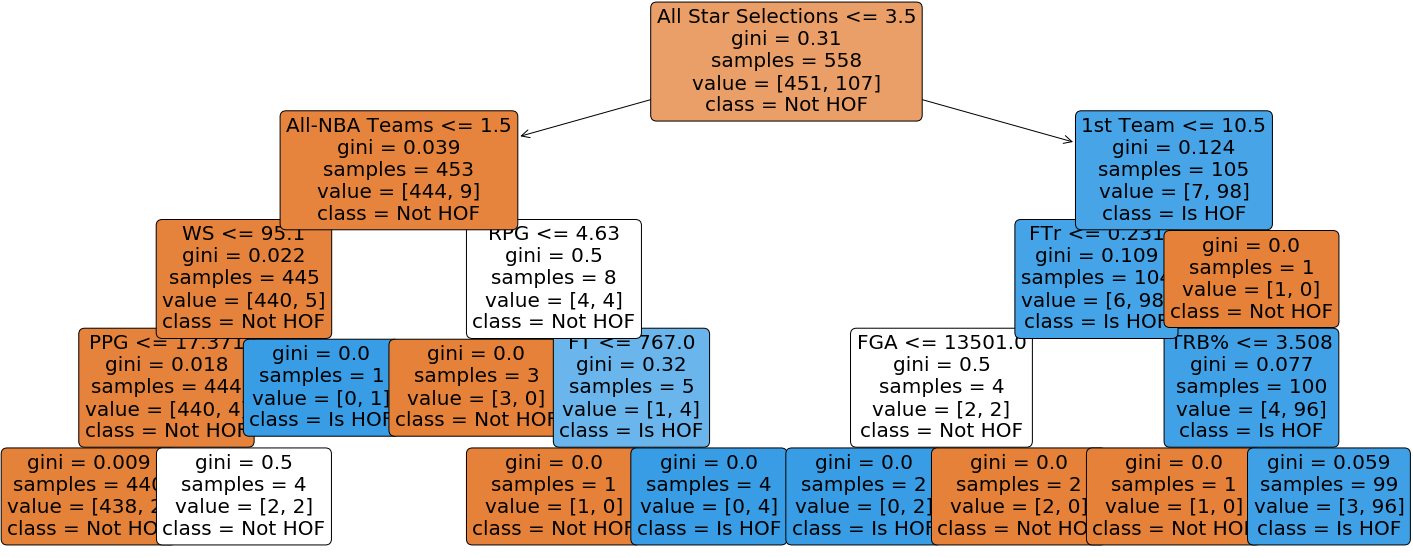

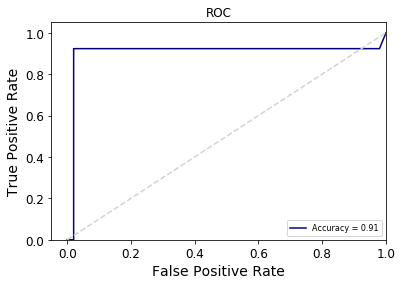

              precision    recall  f1-score   support

     Not HOF       0.96      1.00      0.98        47
      Is HOF       1.00      0.87      0.93        15

    accuracy                           0.97        62
   macro avg       0.98      0.93      0.95        62
weighted avg       0.97      0.97      0.97        62


Accuracy =  0.8992907801418439


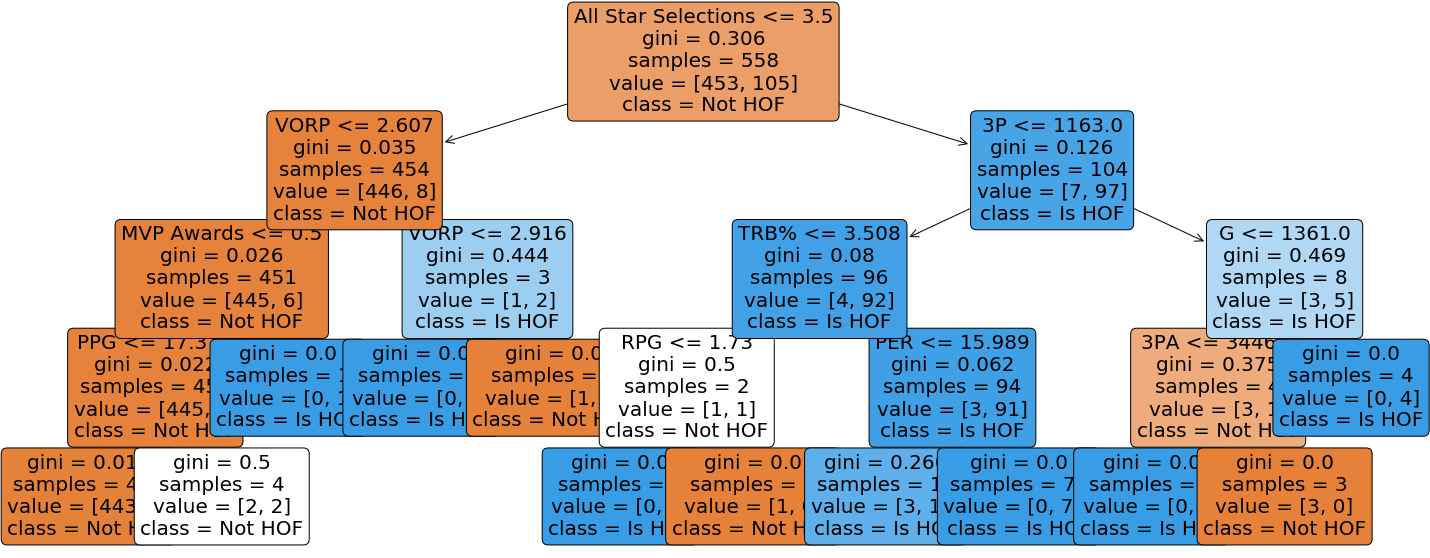

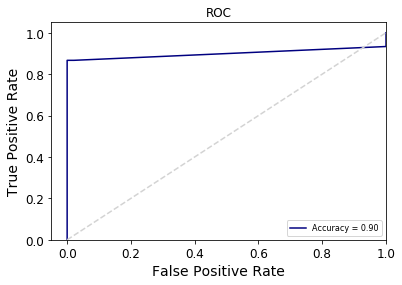

              precision    recall  f1-score   support

     Not HOF       0.92      0.96      0.94        49
      Is HOF       0.82      0.69      0.75        13

    accuracy                           0.90        62
   macro avg       0.87      0.83      0.85        62
weighted avg       0.90      0.90      0.90        62


Accuracy =  0.8241758241758241


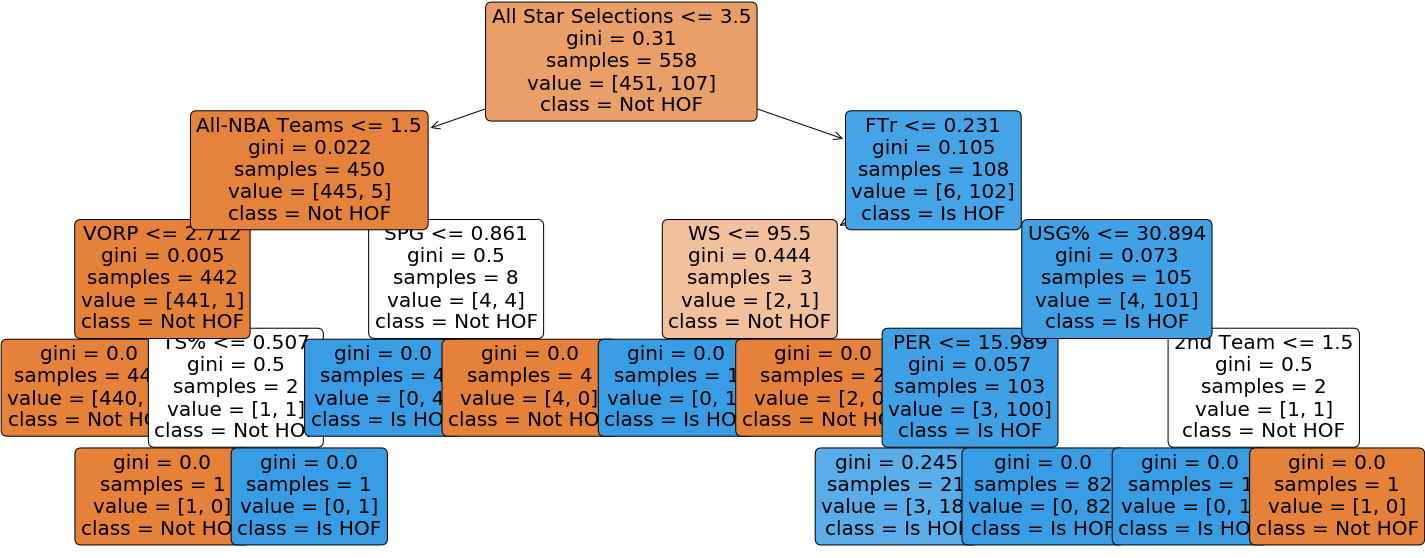

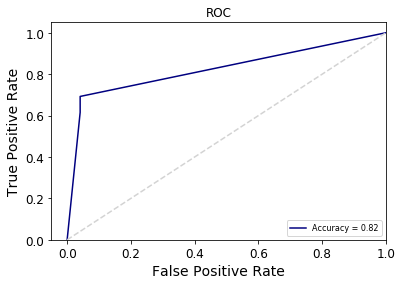

              precision    recall  f1-score   support

     Not HOF       0.96      0.98      0.97        47
      Is HOF       0.93      0.87      0.90        15

    accuracy                           0.95        62
   macro avg       0.94      0.92      0.93        62
weighted avg       0.95      0.95      0.95        62


Accuracy =  0.8900709219858155


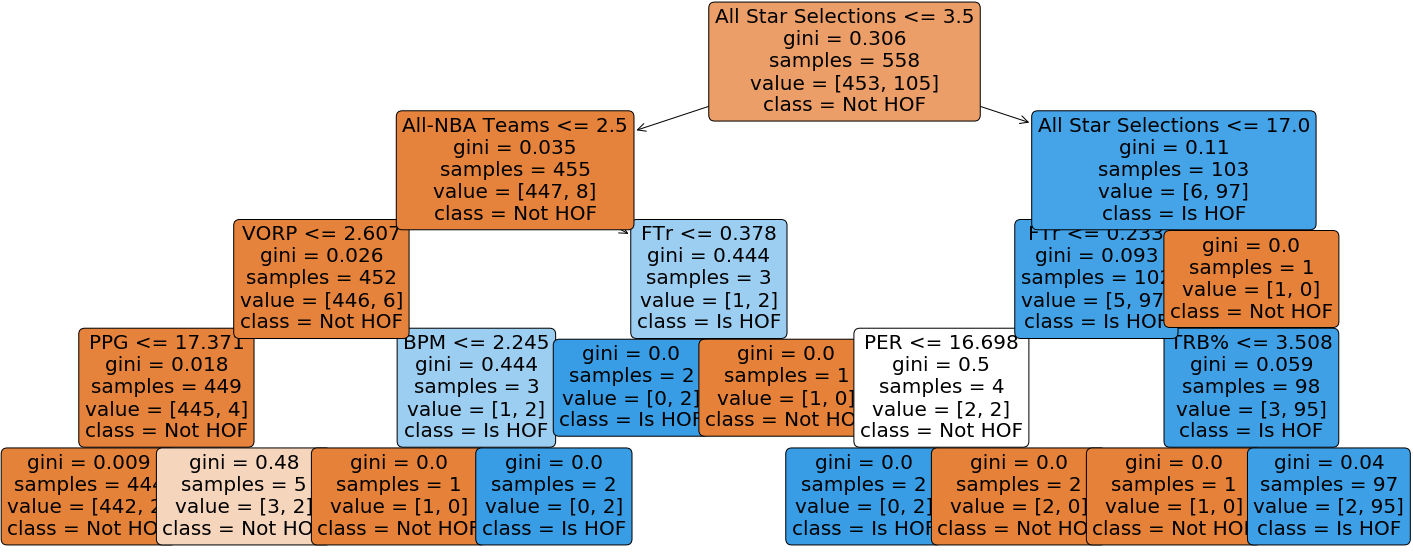

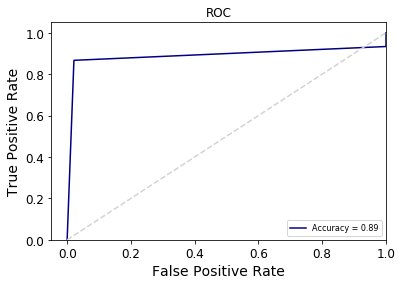

              precision    recall  f1-score   support

     Not HOF       0.98      1.00      0.99        52
      Is HOF       1.00      0.90      0.95        10

    accuracy                           0.98        62
   macro avg       0.99      0.95      0.97        62
weighted avg       0.98      0.98      0.98        62


Accuracy =  0.9009615384615385


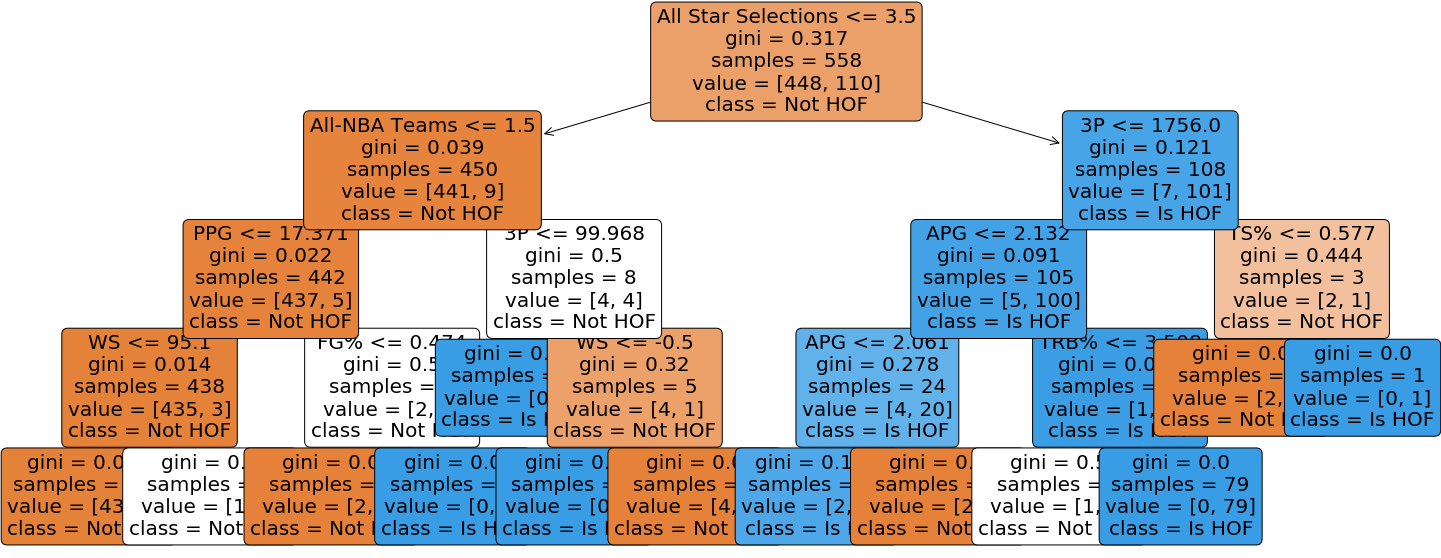

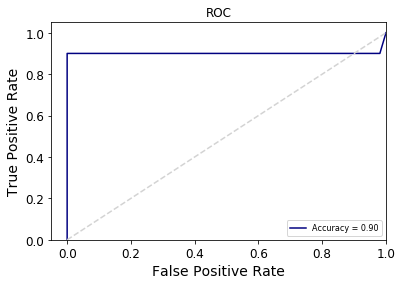

              precision    recall  f1-score   support

     Not HOF       1.00      0.96      0.98        52
      Is HOF       0.83      1.00      0.91        10

    accuracy                           0.97        62
   macro avg       0.92      0.98      0.94        62
weighted avg       0.97      0.97      0.97        62


Accuracy =  0.976923076923077


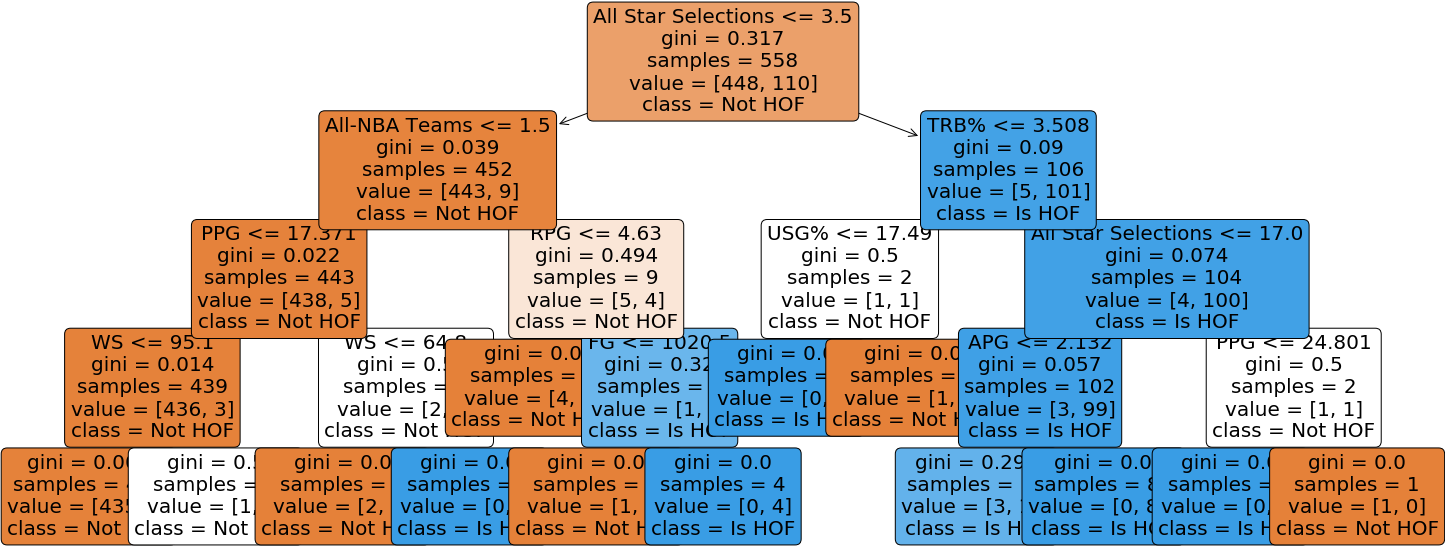

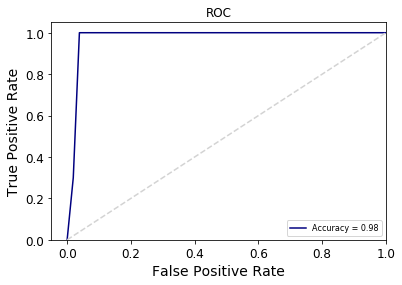

In [13]:
tree_clf = DecisionTreeClassifier(max_depth=4, criterion="gini")

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    tree_clf.fit(X_train, y_train)
    
    y_pred = tree_clf.predict(X_test)
    
    print(classification_report(y_test, y_pred, target_names=target_names))
    
    plt.figure(figsize=(25,10))
    a = plot_tree(tree_clf, 
              feature_names=feature_columns, 
              class_names=target_names, 
              filled=True, 
              rounded=True, 
              fontsize=20)
        
    print()
    
    y_score = tree_clf.predict_proba(X_test)

    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_score[:,1])
    
    roc_auc = auc(false_positive_rate, true_positive_rate)
    print('Accuracy = ', roc_auc)

    count = 1

    # Get different color each graph line
    colorSet = ['navy', 'greenyellow', 'deepskyblue', 'darkviolet', 'crimson', 
                'darkslategray', 'indigo', 'brown', 'orange', 'palevioletred', 'mediumseagreen',
                'k', 'darkgoldenrod', 'g', 'midnightblue', 'c', 'y', 'r', 'b', 'm', 'lawngreen'
                'mediumturquoise', 'lime', 'teal', 'drive', 'sienna', 'sandybrown']
    color = colorSet[count-1]

    # Plotting
    plt.figure()
    plt.title('ROC')
    plt.plot(false_positive_rate, true_positive_rate, c=color, label=('Accuracy = %0.2f'%roc_auc))
    plt.legend(loc='lower right', prop={'size':8})
    plt.plot([0,1],[0,1], color='lightgrey', linestyle='--')
    plt.xlim([-0.05,1.0])
    plt.ylim([0.0,1.05])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

TRAIN/TEST SPLIT: 80/20

Neighbors: 5
KNN Score: 0.8951612903225806
Cross Val Score: [0.96135266 0.96135266 0.95145631]

[[92  8]
 [ 5 19]]

              precision    recall  f1-score   support

     Not HOF       0.95      0.92      0.93       100
      Is HOF       0.70      0.79      0.75        24

    accuracy                           0.90       124
   macro avg       0.83      0.86      0.84       124
weighted avg       0.90      0.90      0.90       124


Accuracy =  0.92625


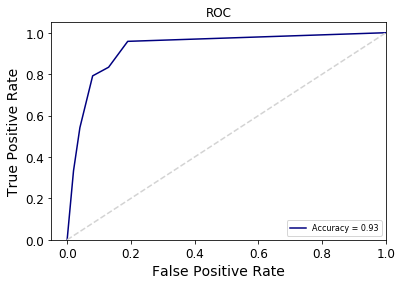

Neighbors: 10
KNN Score: 0.8951612903225806
Cross Val Score: [0.96135266 0.97584541 0.95145631]

[[92  8]
 [ 5 19]]

              precision    recall  f1-score   support

     Not HOF       0.95      0.92      0.93       100
      Is HOF       0.70      0.79      0.75        24

    accuracy                           0.90       124
   macro avg       0.83      0.86      0.84       124
weighted avg       0.90      0.90      0.90       124


Accuracy =  0.9512499999999999


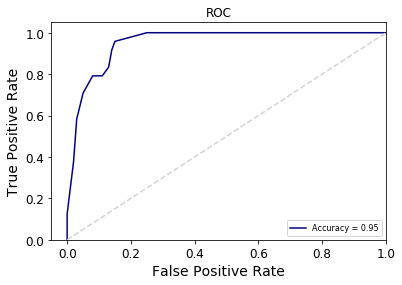

Neighbors: 15
KNN Score: 0.8629032258064516
Cross Val Score: [0.96135266 0.97101449 0.95145631]

[[89 11]
 [ 6 18]]

              precision    recall  f1-score   support

     Not HOF       0.94      0.89      0.91       100
      Is HOF       0.62      0.75      0.68        24

    accuracy                           0.86       124
   macro avg       0.78      0.82      0.80       124
weighted avg       0.88      0.86      0.87       124


Accuracy =  0.9477083333333333


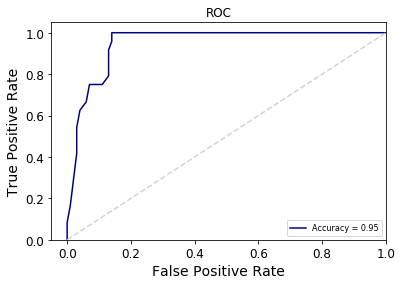

Neighbors: 20
KNN Score: 0.8548387096774194
Cross Val Score: [0.96618357 0.98067633 0.95145631]

[[88 12]
 [ 6 18]]

              precision    recall  f1-score   support

     Not HOF       0.94      0.88      0.91       100
      Is HOF       0.60      0.75      0.67        24

    accuracy                           0.85       124
   macro avg       0.77      0.81      0.79       124
weighted avg       0.87      0.85      0.86       124


Accuracy =  0.9489583333333333


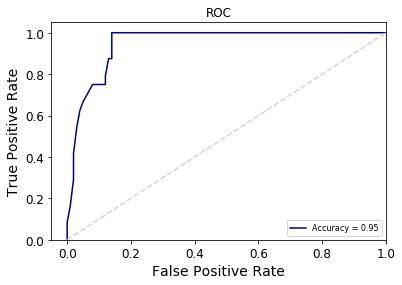

In [14]:
neighbors = [5, 10, 15, 20]
print('TRAIN/TEST SPLIT: 80/20')
print()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

for i in neighbors:
        print('Neighbors: ' + str(i))
        knn = KNeighborsClassifier(n_neighbors = i)
        knn.fit(X_train, y_train)
        
        print('KNN Score: ' + str(knn.score(X_test, y_test)))
        
        print("Cross Val Score: " + str(cross_val_score(tree_clf, allPlayers[feature_columns], allPlayers['isHOF'], cv=3)))
        print()

        y_pred = knn.predict(X_test)

        # plot a confusion matrix
        confusion_mat = confusion_matrix(y_test, y_pred)

        print(confusion_mat)
        print()

        target_names = ['Not HOF','Is HOF']
        result_metrics = classification_report(y_test, y_pred, target_names=target_names)

        print(result_metrics)

        print()
        
        y_score = knn.predict_proba(X_test)

        false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_score[:,1])

        roc_auc = auc(false_positive_rate, true_positive_rate)
        print('Accuracy = ', roc_auc)

        count = 1

        # Get different color each graph line
        colorSet = ['navy', 'greenyellow', 'deepskyblue', 'darkviolet', 'crimson', 
                    'darkslategray', 'indigo', 'brown', 'orange', 'palevioletred', 'mediumseagreen',
                    'k', 'darkgoldenrod', 'g', 'midnightblue', 'c', 'y', 'r', 'b', 'm', 'lawngreen'
                    'mediumturquoise', 'lime', 'teal', 'drive', 'sienna', 'sandybrown']
        color = colorSet[count-1]

        # Plotting
        plt.title('ROC')
        plt.plot(false_positive_rate, true_positive_rate, c=color, label=('Accuracy = %0.2f'%roc_auc))
        plt.legend(loc='lower right', prop={'size':8})
        plt.plot([0,1],[0,1], color='lightgrey', linestyle='--')
        plt.xlim([-0.05,1.0])
        plt.ylim([0.0,1.05])
        plt.ylabel('True Positive Rate')
        plt.xlabel('False Positive Rate')
        plt.show()

              precision    recall  f1-score   support

     Not HOF       0.90      0.90      0.90        51
      Is HOF       0.55      0.55      0.55        11

    accuracy                           0.84        62
   macro avg       0.72      0.72      0.72        62
weighted avg       0.84      0.84      0.84        62

Accuracy =  0.8770053475935828


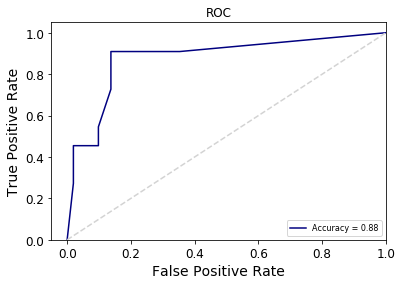

              precision    recall  f1-score   support

     Not HOF       0.96      0.94      0.95        52
      Is HOF       0.73      0.80      0.76        10

    accuracy                           0.92        62
   macro avg       0.84      0.87      0.86        62
weighted avg       0.92      0.92      0.92        62

Accuracy =  0.9365384615384615


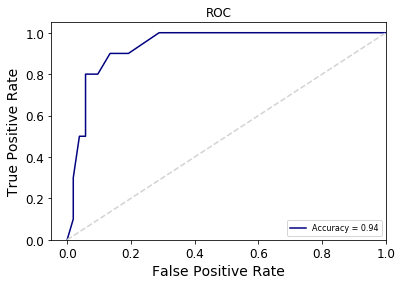

              precision    recall  f1-score   support

     Not HOF       0.94      0.94      0.94        48
      Is HOF       0.79      0.79      0.79        14

    accuracy                           0.90        62
   macro avg       0.86      0.86      0.86        62
weighted avg       0.90      0.90      0.90        62

Accuracy =  0.9322916666666667


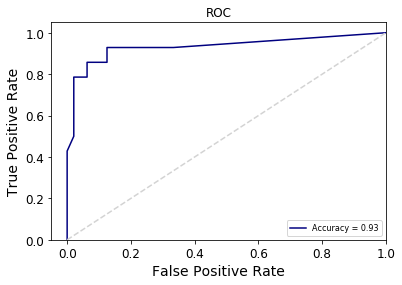

              precision    recall  f1-score   support

     Not HOF       0.92      0.96      0.94        48
      Is HOF       0.83      0.71      0.77        14

    accuracy                           0.90        62
   macro avg       0.88      0.84      0.85        62
weighted avg       0.90      0.90      0.90        62

Accuracy =  0.9575892857142858


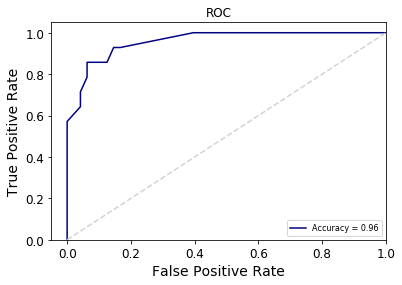

              precision    recall  f1-score   support

     Not HOF       0.92      0.98      0.95        48
      Is HOF       0.91      0.71      0.80        14

    accuracy                           0.92        62
   macro avg       0.92      0.85      0.87        62
weighted avg       0.92      0.92      0.92        62

Accuracy =  0.9709821428571428


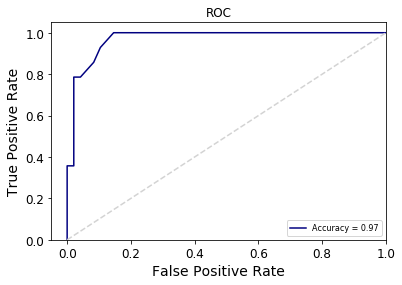

              precision    recall  f1-score   support

     Not HOF       0.92      0.94      0.93        47
      Is HOF       0.79      0.73      0.76        15

    accuracy                           0.89        62
   macro avg       0.85      0.83      0.84        62
weighted avg       0.88      0.89      0.89        62

Accuracy =  0.946808510638298


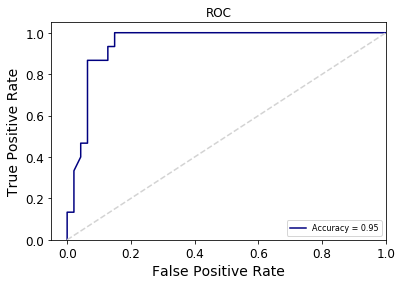

              precision    recall  f1-score   support

     Not HOF       0.94      0.96      0.95        48
      Is HOF       0.85      0.79      0.81        14

    accuracy                           0.92        62
   macro avg       0.89      0.87      0.88        62
weighted avg       0.92      0.92      0.92        62

Accuracy =  0.9880952380952381


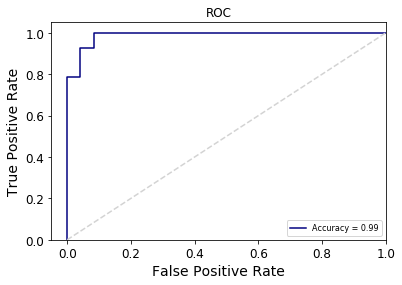

              precision    recall  f1-score   support

     Not HOF       0.94      0.91      0.92        53
      Is HOF       0.55      0.67      0.60         9

    accuracy                           0.87        62
   macro avg       0.74      0.79      0.76        62
weighted avg       0.88      0.87      0.88        62

Accuracy =  0.8888888888888888


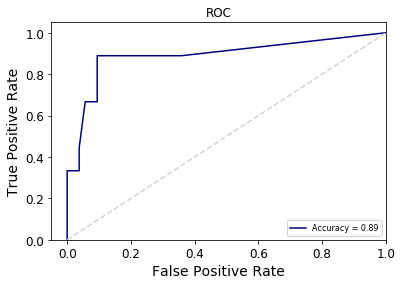

              precision    recall  f1-score   support

     Not HOF       0.91      0.98      0.94        51
      Is HOF       0.86      0.55      0.67        11

    accuracy                           0.90        62
   macro avg       0.88      0.76      0.81        62
weighted avg       0.90      0.90      0.89        62

Accuracy =  0.9723707664884136


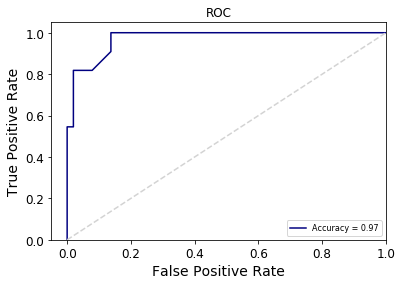

              precision    recall  f1-score   support

     Not HOF       0.96      0.96      0.96        54
      Is HOF       0.75      0.75      0.75         8

    accuracy                           0.94        62
   macro avg       0.86      0.86      0.86        62
weighted avg       0.94      0.94      0.94        62

Accuracy =  0.96875


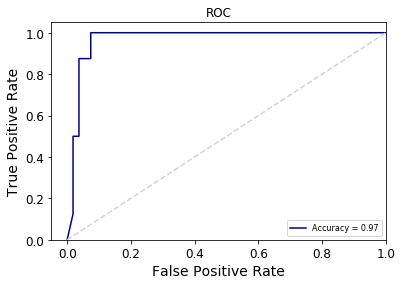

In [15]:
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    knn.fit(X_train, y_train)
    
    y_pred = knn.predict(X_test)
    
    print(classification_report(y_test, y_pred, target_names=target_names))
    
    y_score = knn.predict_proba(X_test)

    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_score[:,1])

    roc_auc = auc(false_positive_rate, true_positive_rate)
    print('Accuracy = ', roc_auc)

    count = 1

    # Get different color each graph line
    colorSet = ['navy', 'greenyellow', 'deepskyblue', 'darkviolet', 'crimson', 
                'darkslategray', 'indigo', 'brown', 'orange', 'palevioletred', 'mediumseagreen',
                'k', 'darkgoldenrod', 'g', 'midnightblue', 'c', 'y', 'r', 'b', 'm', 'lawngreen'
                'mediumturquoise', 'lime', 'teal', 'drive', 'sienna', 'sandybrown']
    color = colorSet[count-1]

    # Plotting
    plt.title('ROC')
    plt.plot(false_positive_rate, true_positive_rate, c=color, label=('Accuracy = %0.2f'%roc_auc))
    plt.legend(loc='lower right', prop={'size':8})
    plt.plot([0,1],[0,1], color='lightgrey', linestyle='--')
    plt.xlim([-0.05,1.0])
    plt.ylim([0.0,1.05])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

TRAIN/TEST SPLIT: 80/20

NBCLF Score: 0.9516129032258065
Cross Val Score: [0.96135266 0.97101449 0.94660194]

[[93  4]
 [ 2 25]]

              precision    recall  f1-score   support

     Not HOF       0.98      0.96      0.97        97
      Is HOF       0.86      0.93      0.89        27

    accuracy                           0.95       124
   macro avg       0.92      0.94      0.93       124
weighted avg       0.95      0.95      0.95       124


Accuracy =  0.9702176403207331


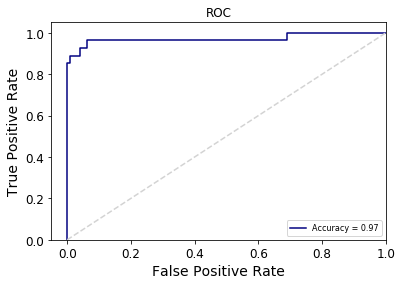

In [16]:
print('TRAIN/TEST SPLIT: 80/20')
print()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)
nbclf = GaussianNB().fit(X_train, y_train)
print("NBCLF Score: " + str(nbclf.score(X_test, y_test)))
    
print("Cross Val Score: " + str(cross_val_score(tree_clf, allPlayers[feature_columns], allPlayers['isHOF'], cv=3)))
print()

y_pred = nbclf.predict(X_test)

# plot a confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)

print(confusion_mat)
print()

target_names = ['Not HOF','Is HOF']
result_metrics = classification_report(y_test, y_pred, target_names=target_names)

print(result_metrics)

print()
    
y_score = nbclf.predict_proba(X_test)

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_score[:,1])

roc_auc = auc(false_positive_rate, true_positive_rate)
print('Accuracy = ', roc_auc)

count = 1

# Get different color each graph line
colorSet = ['navy', 'greenyellow', 'deepskyblue', 'darkviolet', 'crimson', 
            'darkslategray', 'indigo', 'brown', 'orange', 'palevioletred', 'mediumseagreen',
            'k', 'darkgoldenrod', 'g', 'midnightblue', 'c', 'y', 'r', 'b', 'm', 'lawngreen'
            'mediumturquoise', 'lime', 'teal', 'drive', 'sienna', 'sandybrown']
color = colorSet[count-1]

# Plotting
plt.title('ROC')
plt.plot(false_positive_rate, true_positive_rate, c=color, label=('Accuracy = %0.2f'%roc_auc))
plt.legend(loc='lower right', prop={'size':8})
plt.plot([0,1],[0,1], color='lightgrey', linestyle='--')
plt.xlim([-0.05,1.0])
plt.ylim([0.0,1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

              precision    recall  f1-score   support

     Not HOF       1.00      0.94      0.97        52
      Is HOF       0.77      1.00      0.87        10

    accuracy                           0.95        62
   macro avg       0.88      0.97      0.92        62
weighted avg       0.96      0.95      0.95        62

Accuracy =  0.9826923076923076


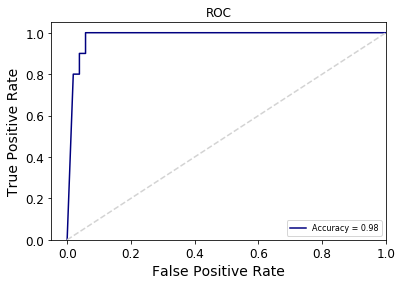

              precision    recall  f1-score   support

     Not HOF       0.98      0.88      0.92        48
      Is HOF       0.68      0.93      0.79        14

    accuracy                           0.89        62
   macro avg       0.83      0.90      0.86        62
weighted avg       0.91      0.89      0.89        62

Accuracy =  0.9360119047619048


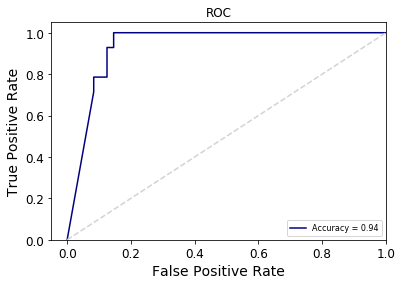

              precision    recall  f1-score   support

     Not HOF       0.98      0.98      0.98        44
      Is HOF       0.94      0.94      0.94        18

    accuracy                           0.97        62
   macro avg       0.96      0.96      0.96        62
weighted avg       0.97      0.97      0.97        62

Accuracy =  0.9880050505050505


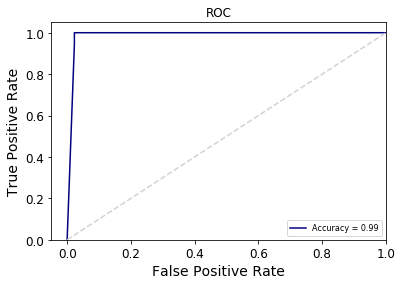

              precision    recall  f1-score   support

     Not HOF       1.00      0.88      0.94        50
      Is HOF       0.67      1.00      0.80        12

    accuracy                           0.90        62
   macro avg       0.83      0.94      0.87        62
weighted avg       0.94      0.90      0.91        62

Accuracy =  0.9858333333333333


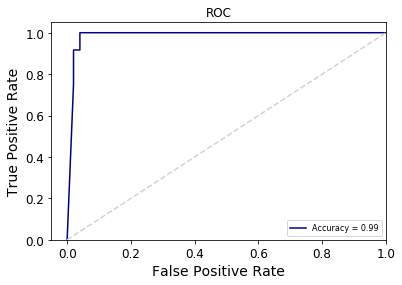

              precision    recall  f1-score   support

     Not HOF       1.00      0.90      0.95        50
      Is HOF       0.71      1.00      0.83        12

    accuracy                           0.92        62
   macro avg       0.85      0.95      0.89        62
weighted avg       0.94      0.92      0.92        62

Accuracy =  0.9616666666666667


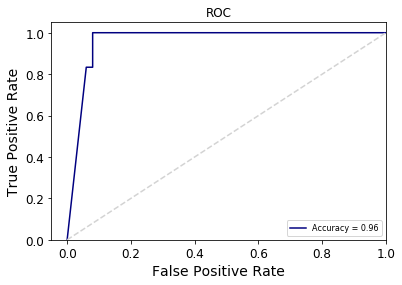

              precision    recall  f1-score   support

     Not HOF       1.00      0.96      0.98        47
      Is HOF       0.88      1.00      0.94        15

    accuracy                           0.97        62
   macro avg       0.94      0.98      0.96        62
weighted avg       0.97      0.97      0.97        62

Accuracy =  0.9858156028368794


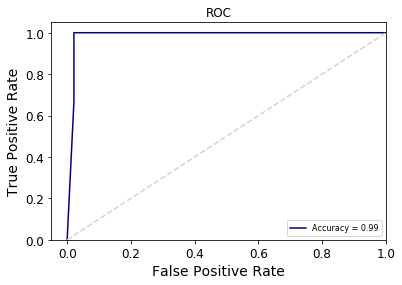

              precision    recall  f1-score   support

     Not HOF       1.00      0.91      0.95        55
      Is HOF       0.58      1.00      0.74         7

    accuracy                           0.92        62
   macro avg       0.79      0.95      0.84        62
weighted avg       0.95      0.92      0.93        62

Accuracy =  0.9688311688311688


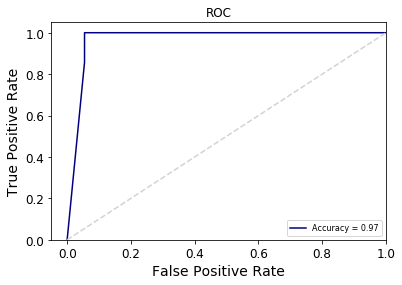

              precision    recall  f1-score   support

     Not HOF       1.00      0.94      0.97        54
      Is HOF       0.73      1.00      0.84         8

    accuracy                           0.95        62
   macro avg       0.86      0.97      0.91        62
weighted avg       0.96      0.95      0.95        62

Accuracy =  1.0


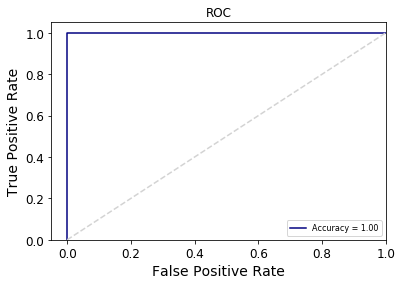

              precision    recall  f1-score   support

     Not HOF       0.92      0.96      0.94        46
      Is HOF       0.86      0.75      0.80        16

    accuracy                           0.90        62
   macro avg       0.89      0.85      0.87        62
weighted avg       0.90      0.90      0.90        62

Accuracy =  0.9198369565217391


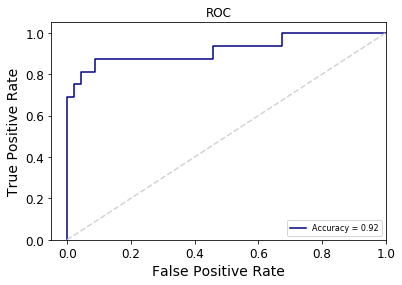

              precision    recall  f1-score   support

     Not HOF       1.00      0.87      0.93        54
      Is HOF       0.53      1.00      0.70         8

    accuracy                           0.89        62
   macro avg       0.77      0.94      0.81        62
weighted avg       0.94      0.89      0.90        62

Accuracy =  0.9884259259259259


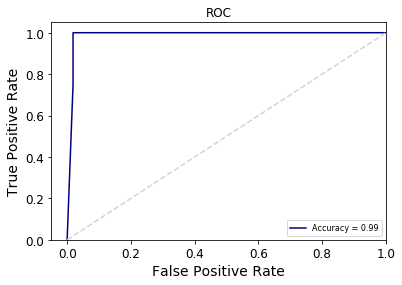

In [17]:
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    nbclf = GaussianNB().fit(X_train, y_train)
    
    y_pred = nbclf.predict(X_test)
    
    print(classification_report(y_test, y_pred, target_names=target_names))
    
    y_score = nbclf.predict_proba(X_test)

    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_score[:,1])

    roc_auc = auc(false_positive_rate, true_positive_rate)
    print('Accuracy = ', roc_auc)

    count = 1

    # Get different color each graph line
    colorSet = ['navy', 'greenyellow', 'deepskyblue', 'darkviolet', 'crimson', 
                'darkslategray', 'indigo', 'brown', 'orange', 'palevioletred', 'mediumseagreen',
                'k', 'darkgoldenrod', 'g', 'midnightblue', 'c', 'y', 'r', 'b', 'm', 'lawngreen'
                'mediumturquoise', 'lime', 'teal', 'drive', 'sienna', 'sandybrown']
    color = colorSet[count-1]

    # Plotting
    plt.title('ROC')
    plt.plot(false_positive_rate, true_positive_rate, c=color, label=('Accuracy = %0.2f'%roc_auc))
    plt.legend(loc='lower right', prop={'size':8})
    plt.plot([0,1],[0,1], color='lightgrey', linestyle='--')
    plt.xlim([-0.05,1.0])
    plt.ylim([0.0,1.05])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

In [18]:
clf = MLPClassifier(hidden_layer_sizes = [25, 20], alpha = .1,
                       random_state = 0, activation='relu',solver='adam').fit(X_train, y_train)
print("Layer 1 Nodes: 25")
print("Layer 2 Nodes: 20" )
print('Accuracy of NN classifier on training set: {:.2f}'
    .format(clf.score(X_train, y_train)))
print('Accuracy of NN classifier on test set: {:.2f}'
    .format(clf.score(X_test, y_test)))
print()

Layer 1 Nodes: 25
Layer 2 Nodes: 20
Accuracy of NN classifier on training set: 0.94
Accuracy of NN classifier on test set: 0.89



/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
